In [2]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from src.Luminosity.red_cesare import doer_of_thing
from src.Calculators.ray_cesare import ray_maker
from src.Luminosity.special_radii import get_photosphere
import scipy.io
from scipy.stats import gmean
fix = 844
m = 6
Rt = (10**m)**(1/3)

num 900
Max:  132
Zero due to: 
 - max travel:  103
- T_low: 1
- flux: 0
Flux:  59
Tot zeros: 104
Negative:  36
Fix 844 , Lum 4.928e+42
num 950
Max:  141
Zero due to: 
 - max travel:  106
- T_low: 1
- flux: 0
Flux:  50
Tot zeros: 107
Negative:  39
Fix 844 , Lum 4.037e+42
num 1000
Max:  134
Zero due to: 
 - max travel:  106
- T_low: 1
- flux: 0
Flux:  57
Tot zeros: 107
Negative:  37
Fix 844 , Lum 4.123e+42
num 1050
Max:  135
Zero due to: 
 - max travel:  107
- T_low: 1
- flux: 0
Flux:  56
Tot zeros: 108
Negative:  41
Fix 844 , Lum 3.850e+42
num 1100
Max:  136
Zero due to: 
 - max travel:  108
- T_low: 1
- flux: 0
Flux:  55
Tot zeros: 109
Negative:  39
Fix 844 , Lum 4.046e+42
num 1150
Max:  138
Zero due to: 
 - max travel:  108
- T_low: 1
- flux: 0
Flux:  53
Tot zeros: 109
Negative:  40
Fix 844 , Lum 4.164e+42
num 1200
Max:  144
Zero due to: 
 - max travel:  109
- T_low: 1
- flux: 0
Flux:  47
Tot zeros: 110
Negative:  41
Fix 844 , Lum 3.923e+42
num 1250
Max:  143
Zero due to: 
 - max tra

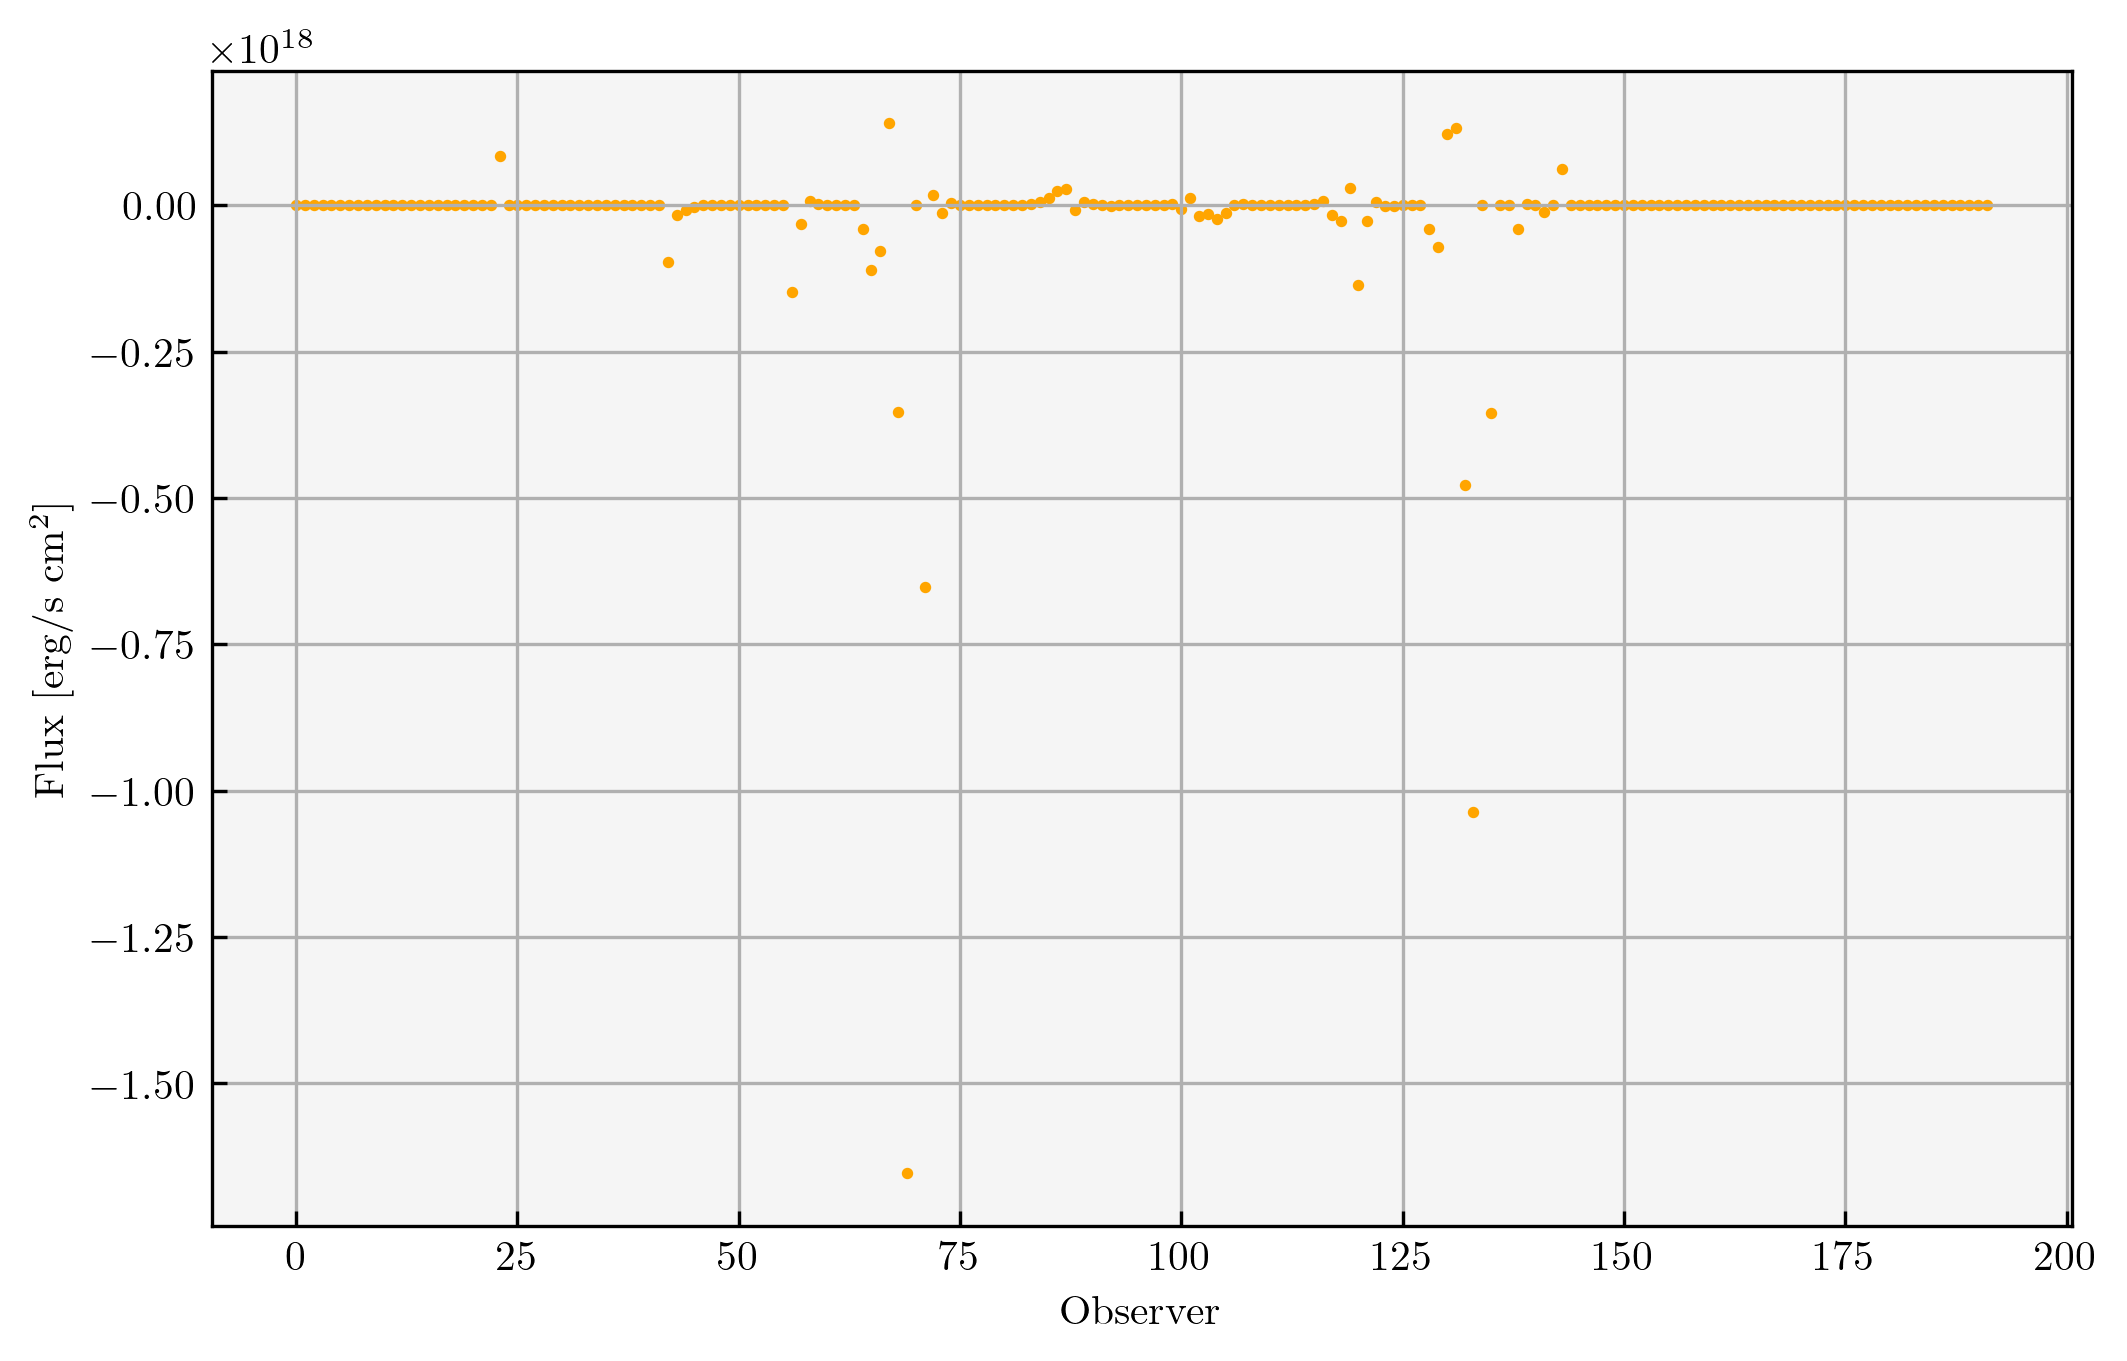

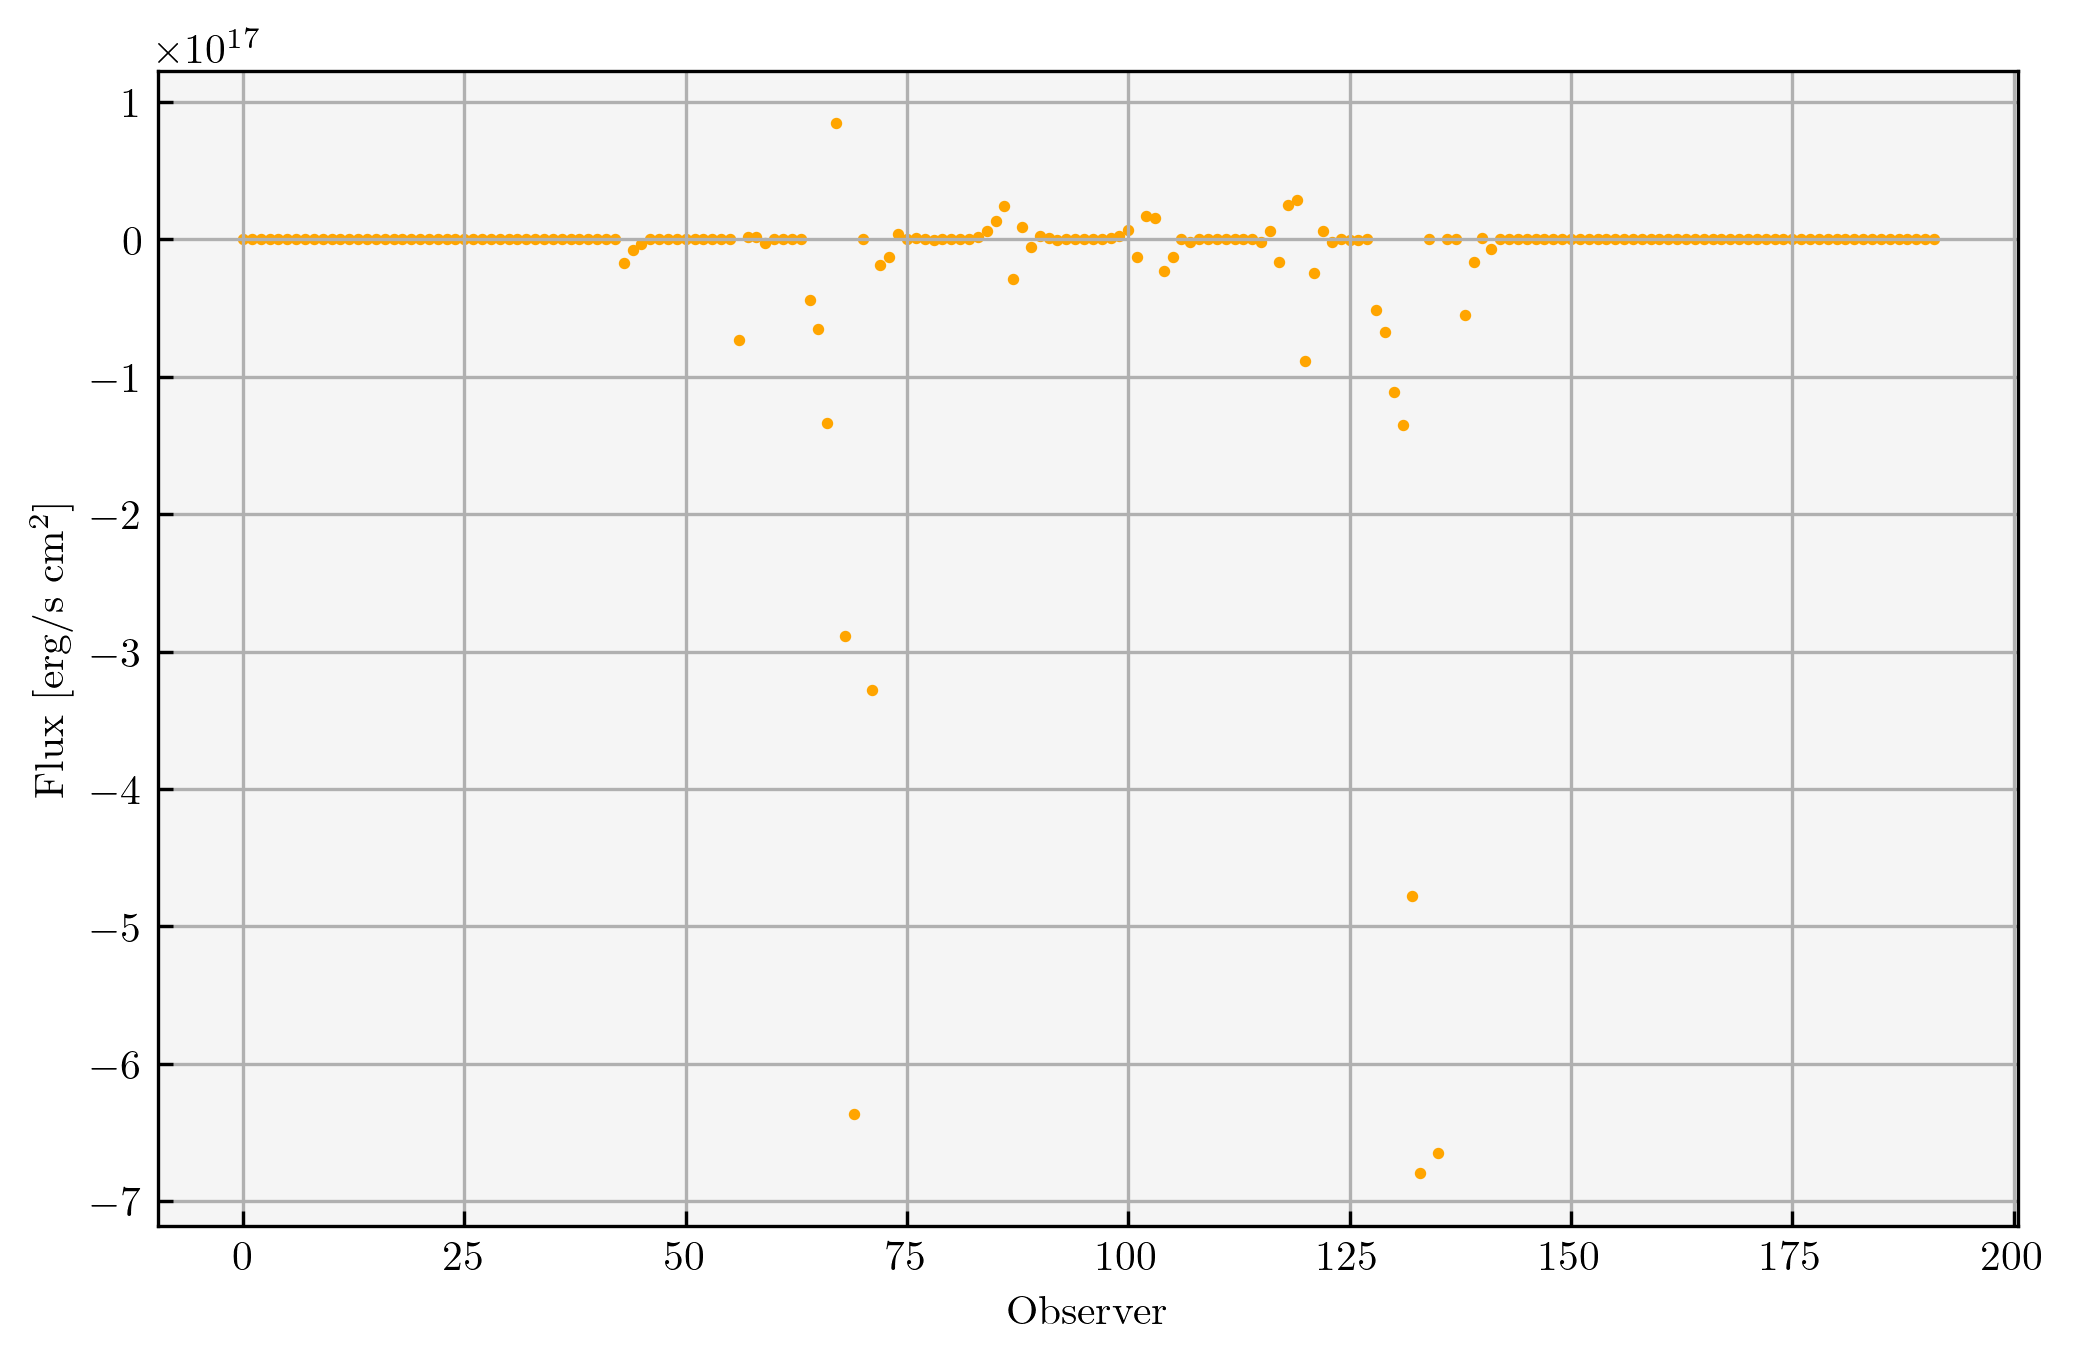

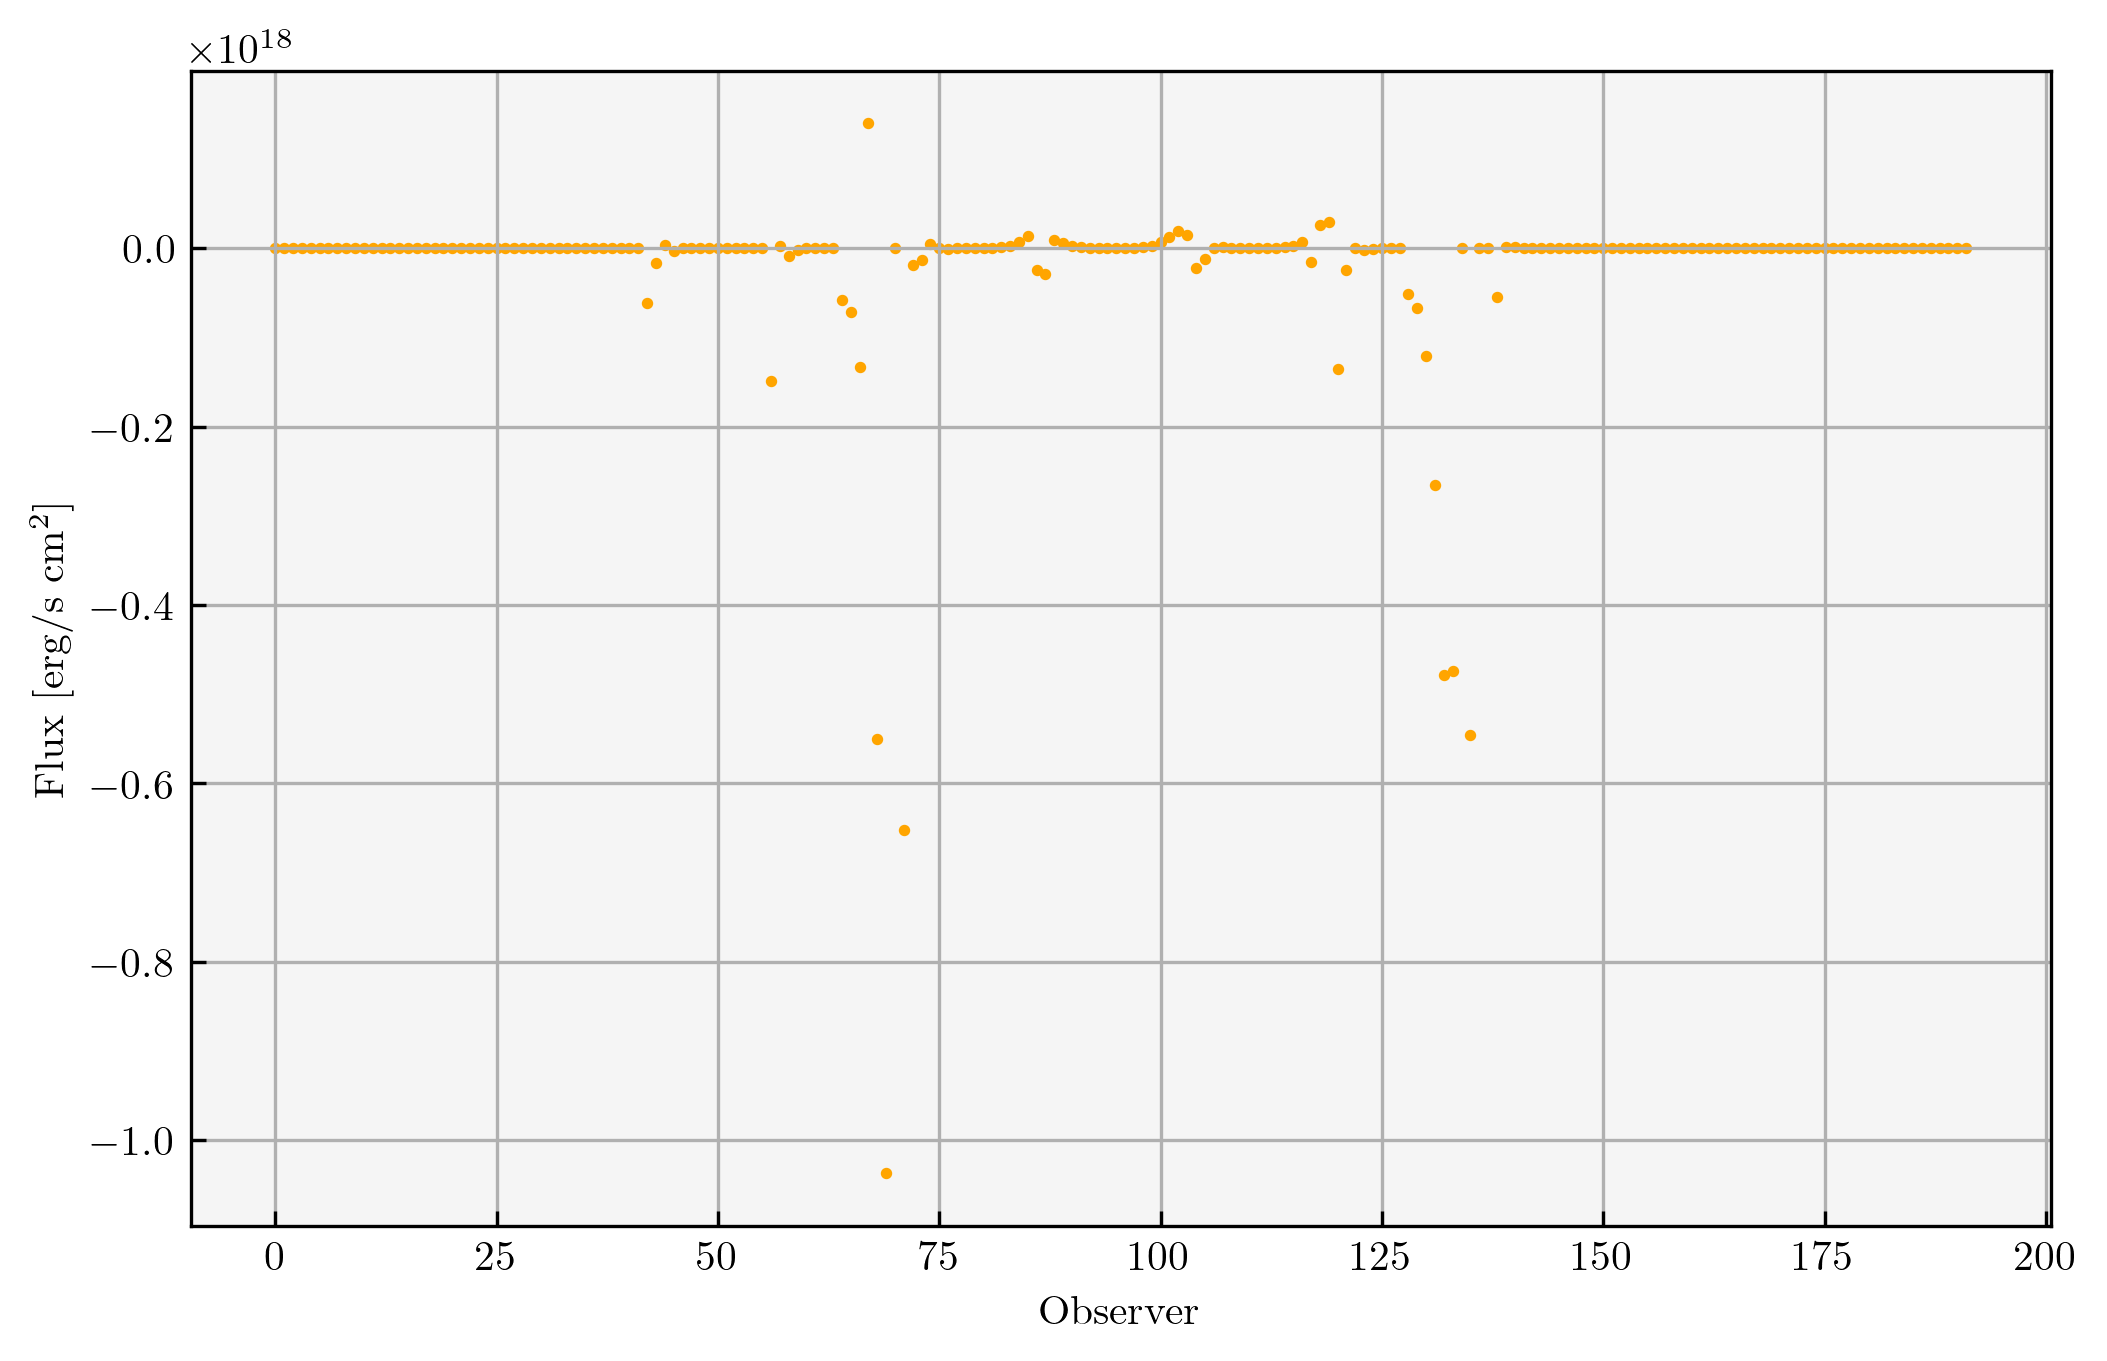

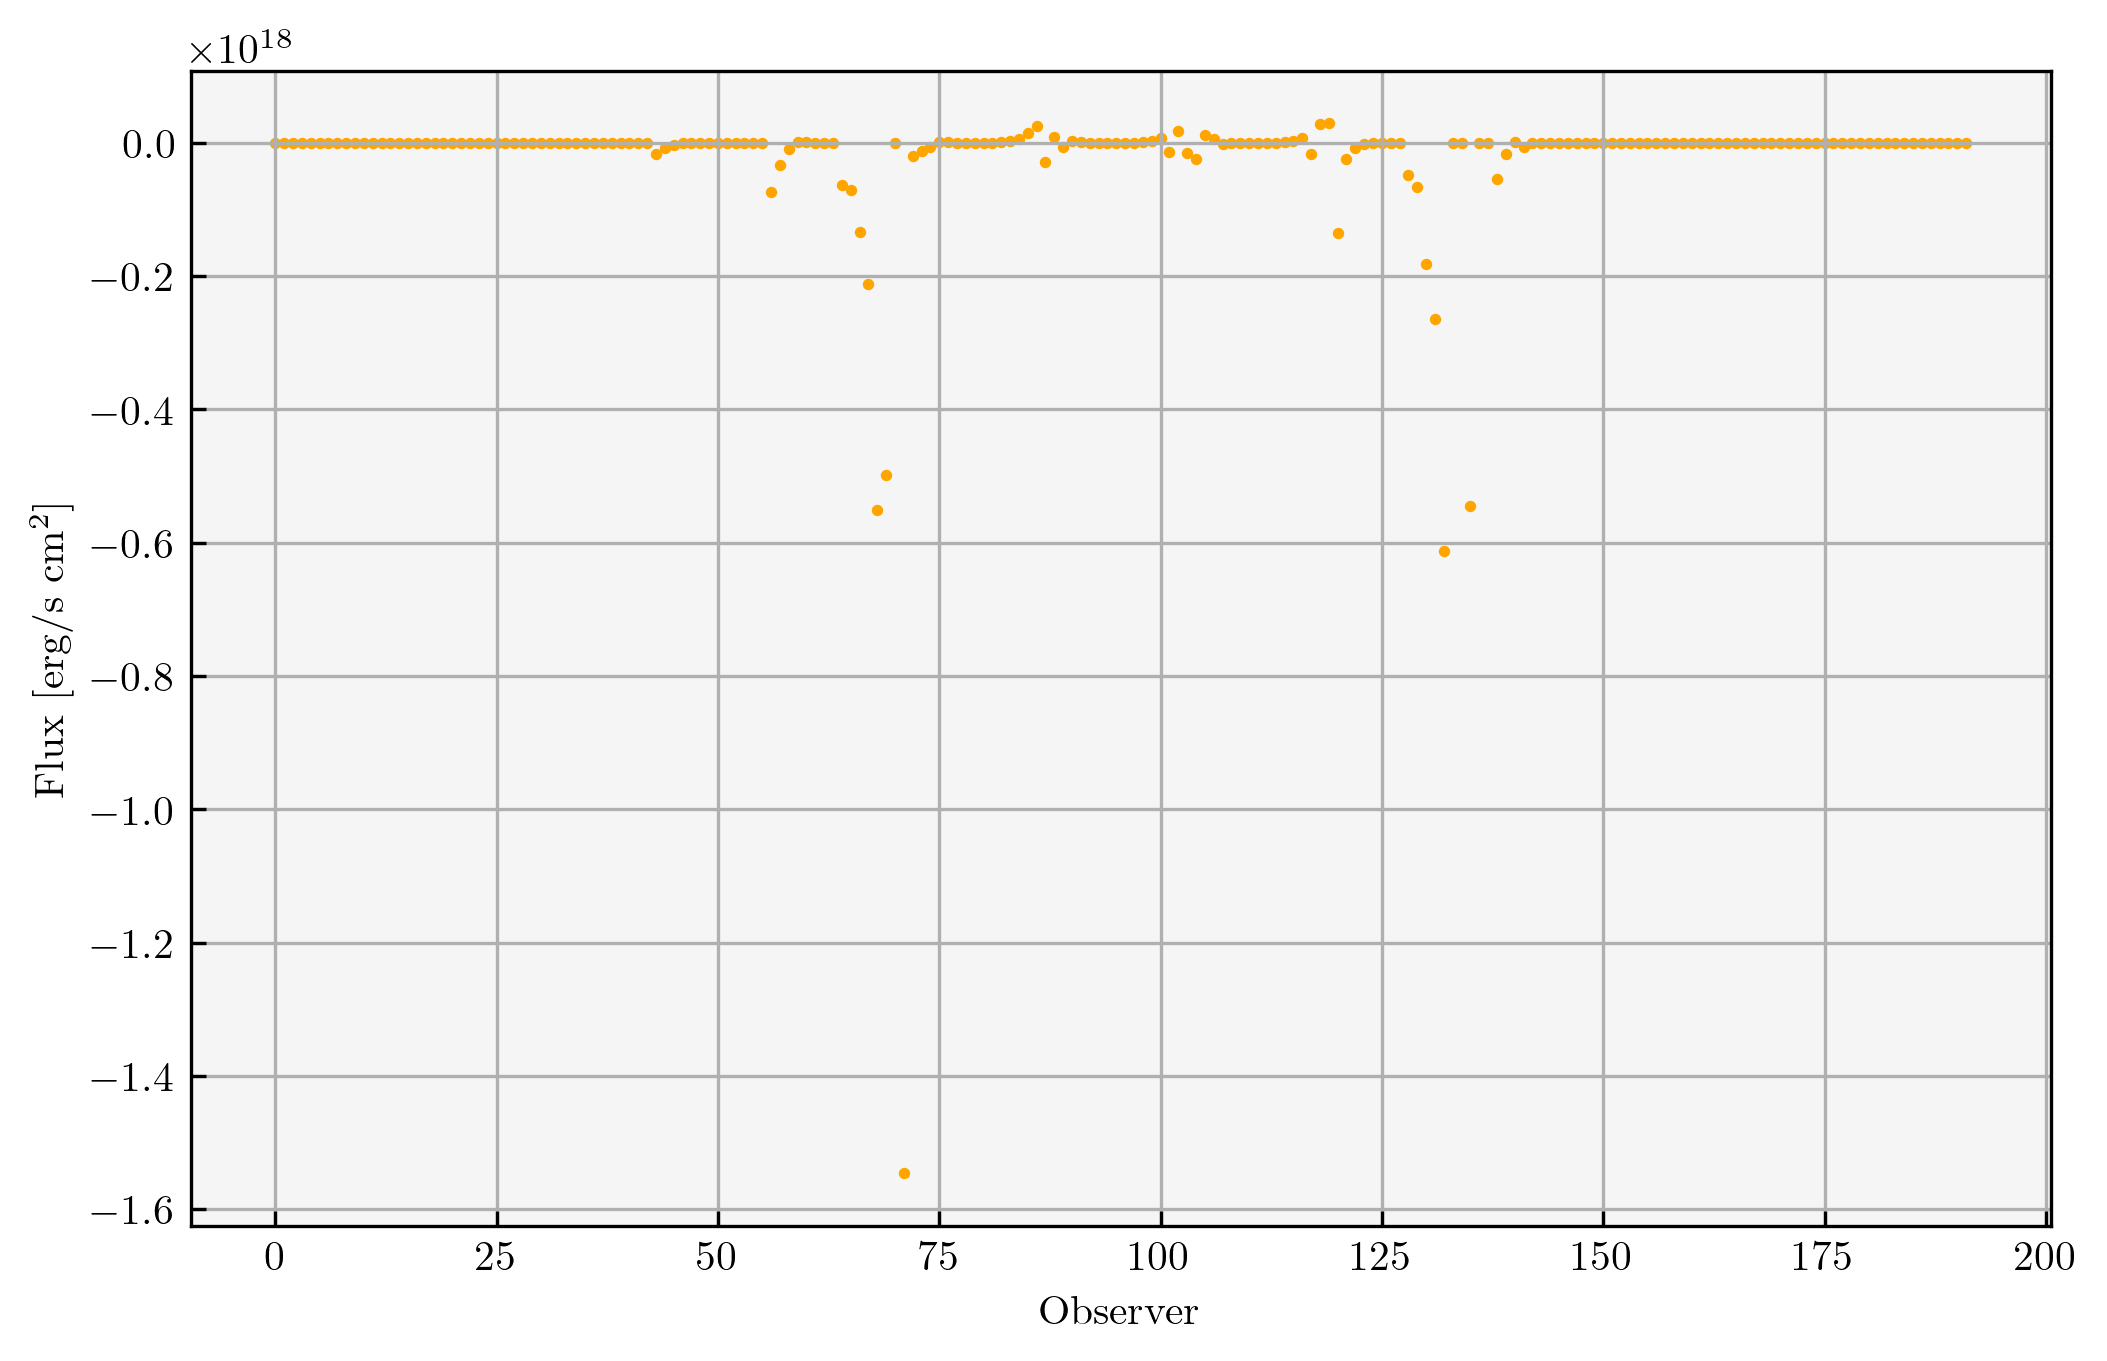

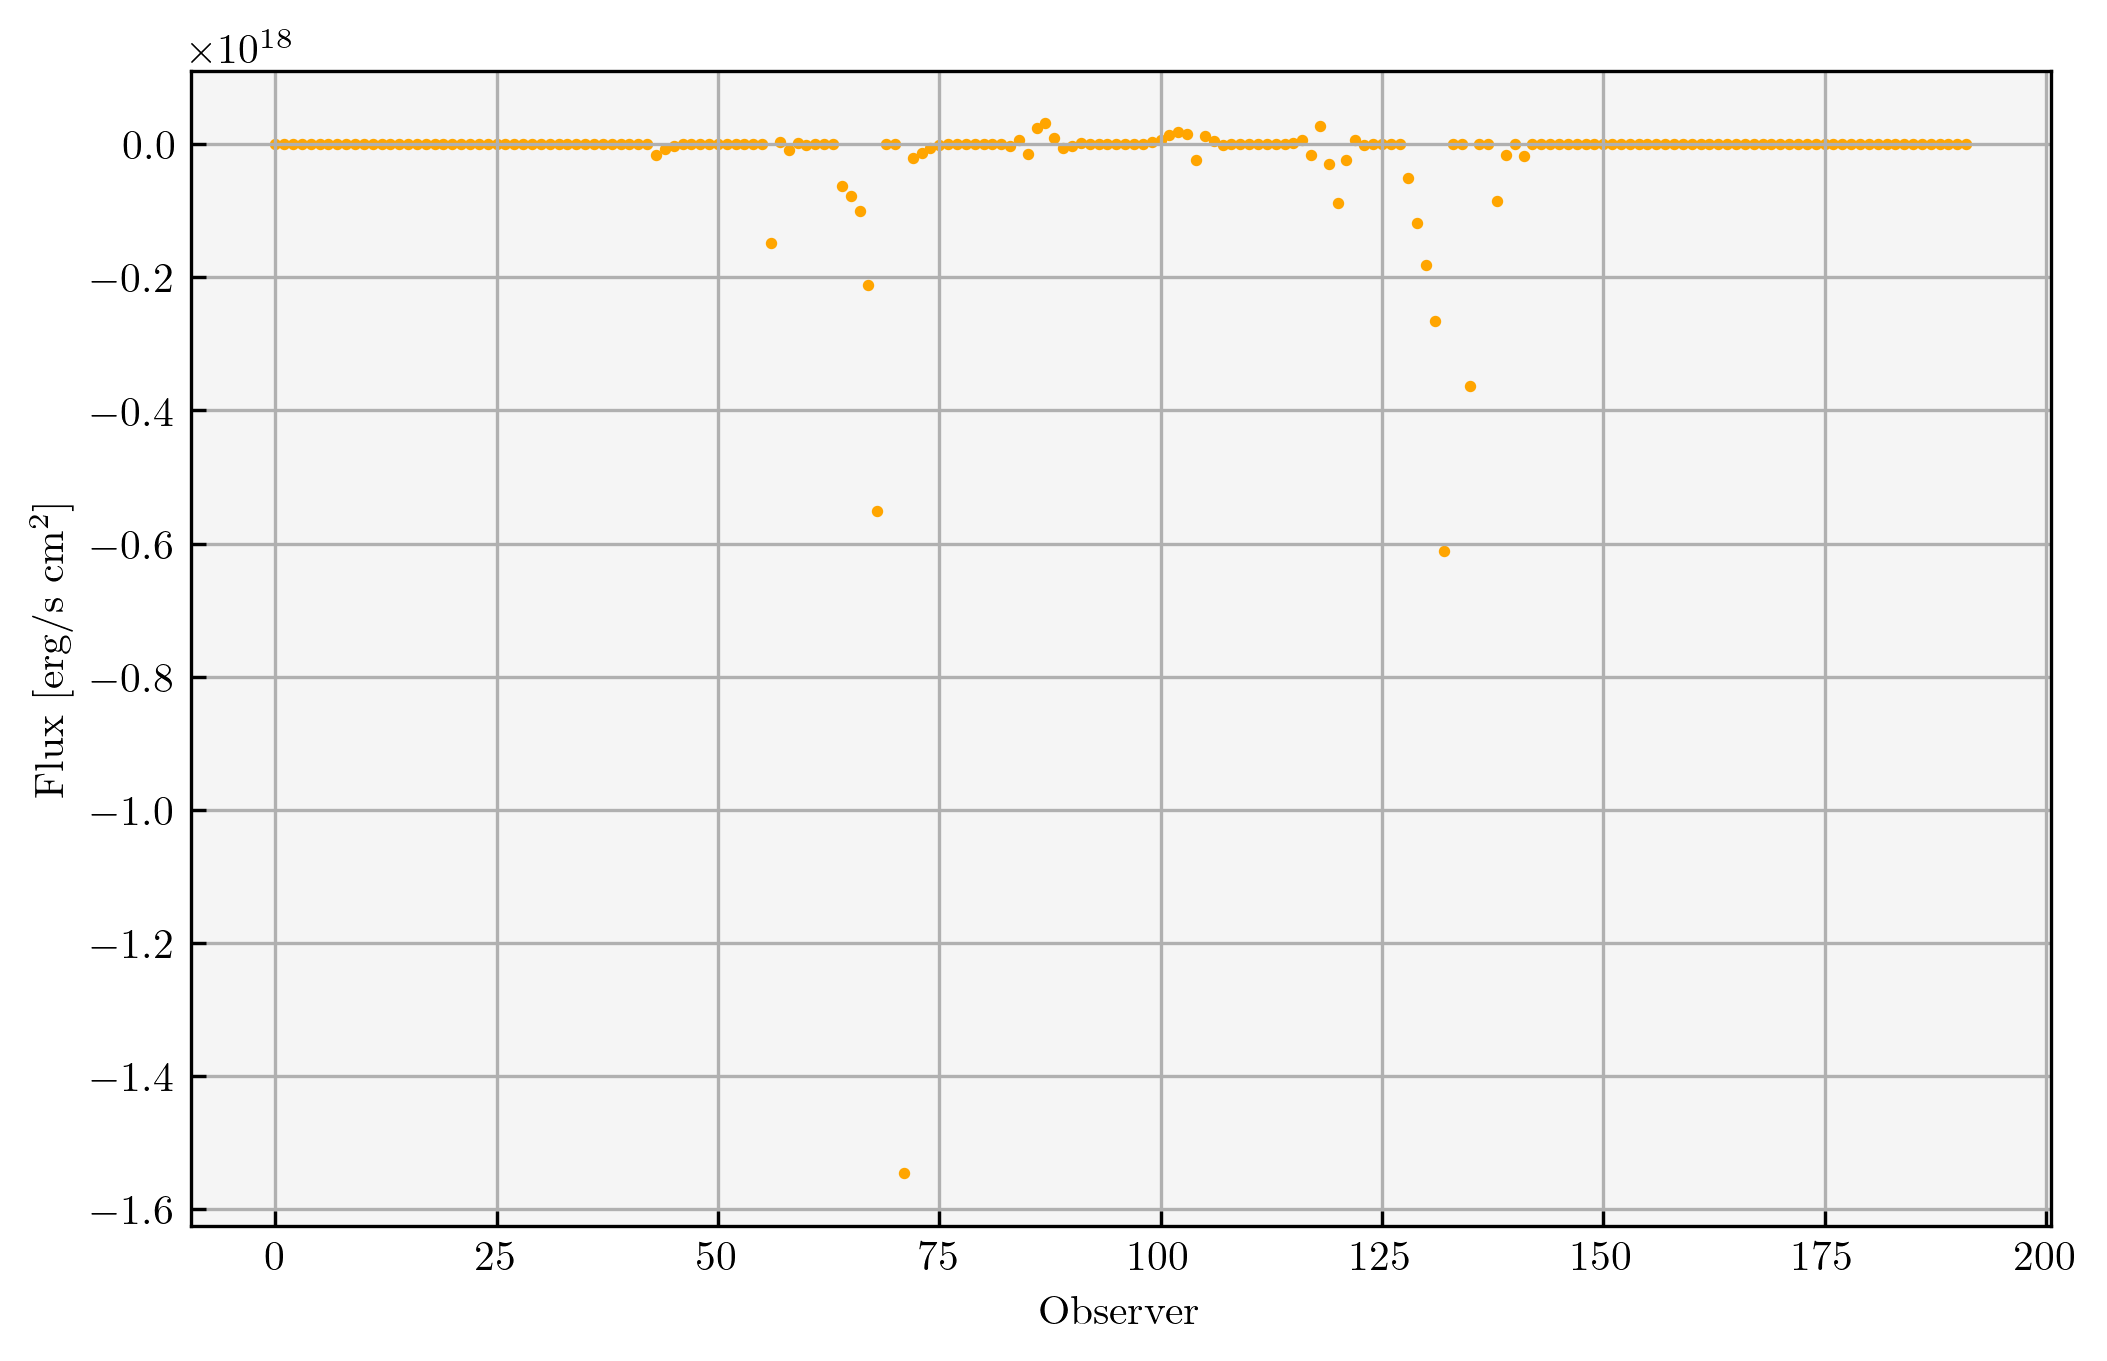

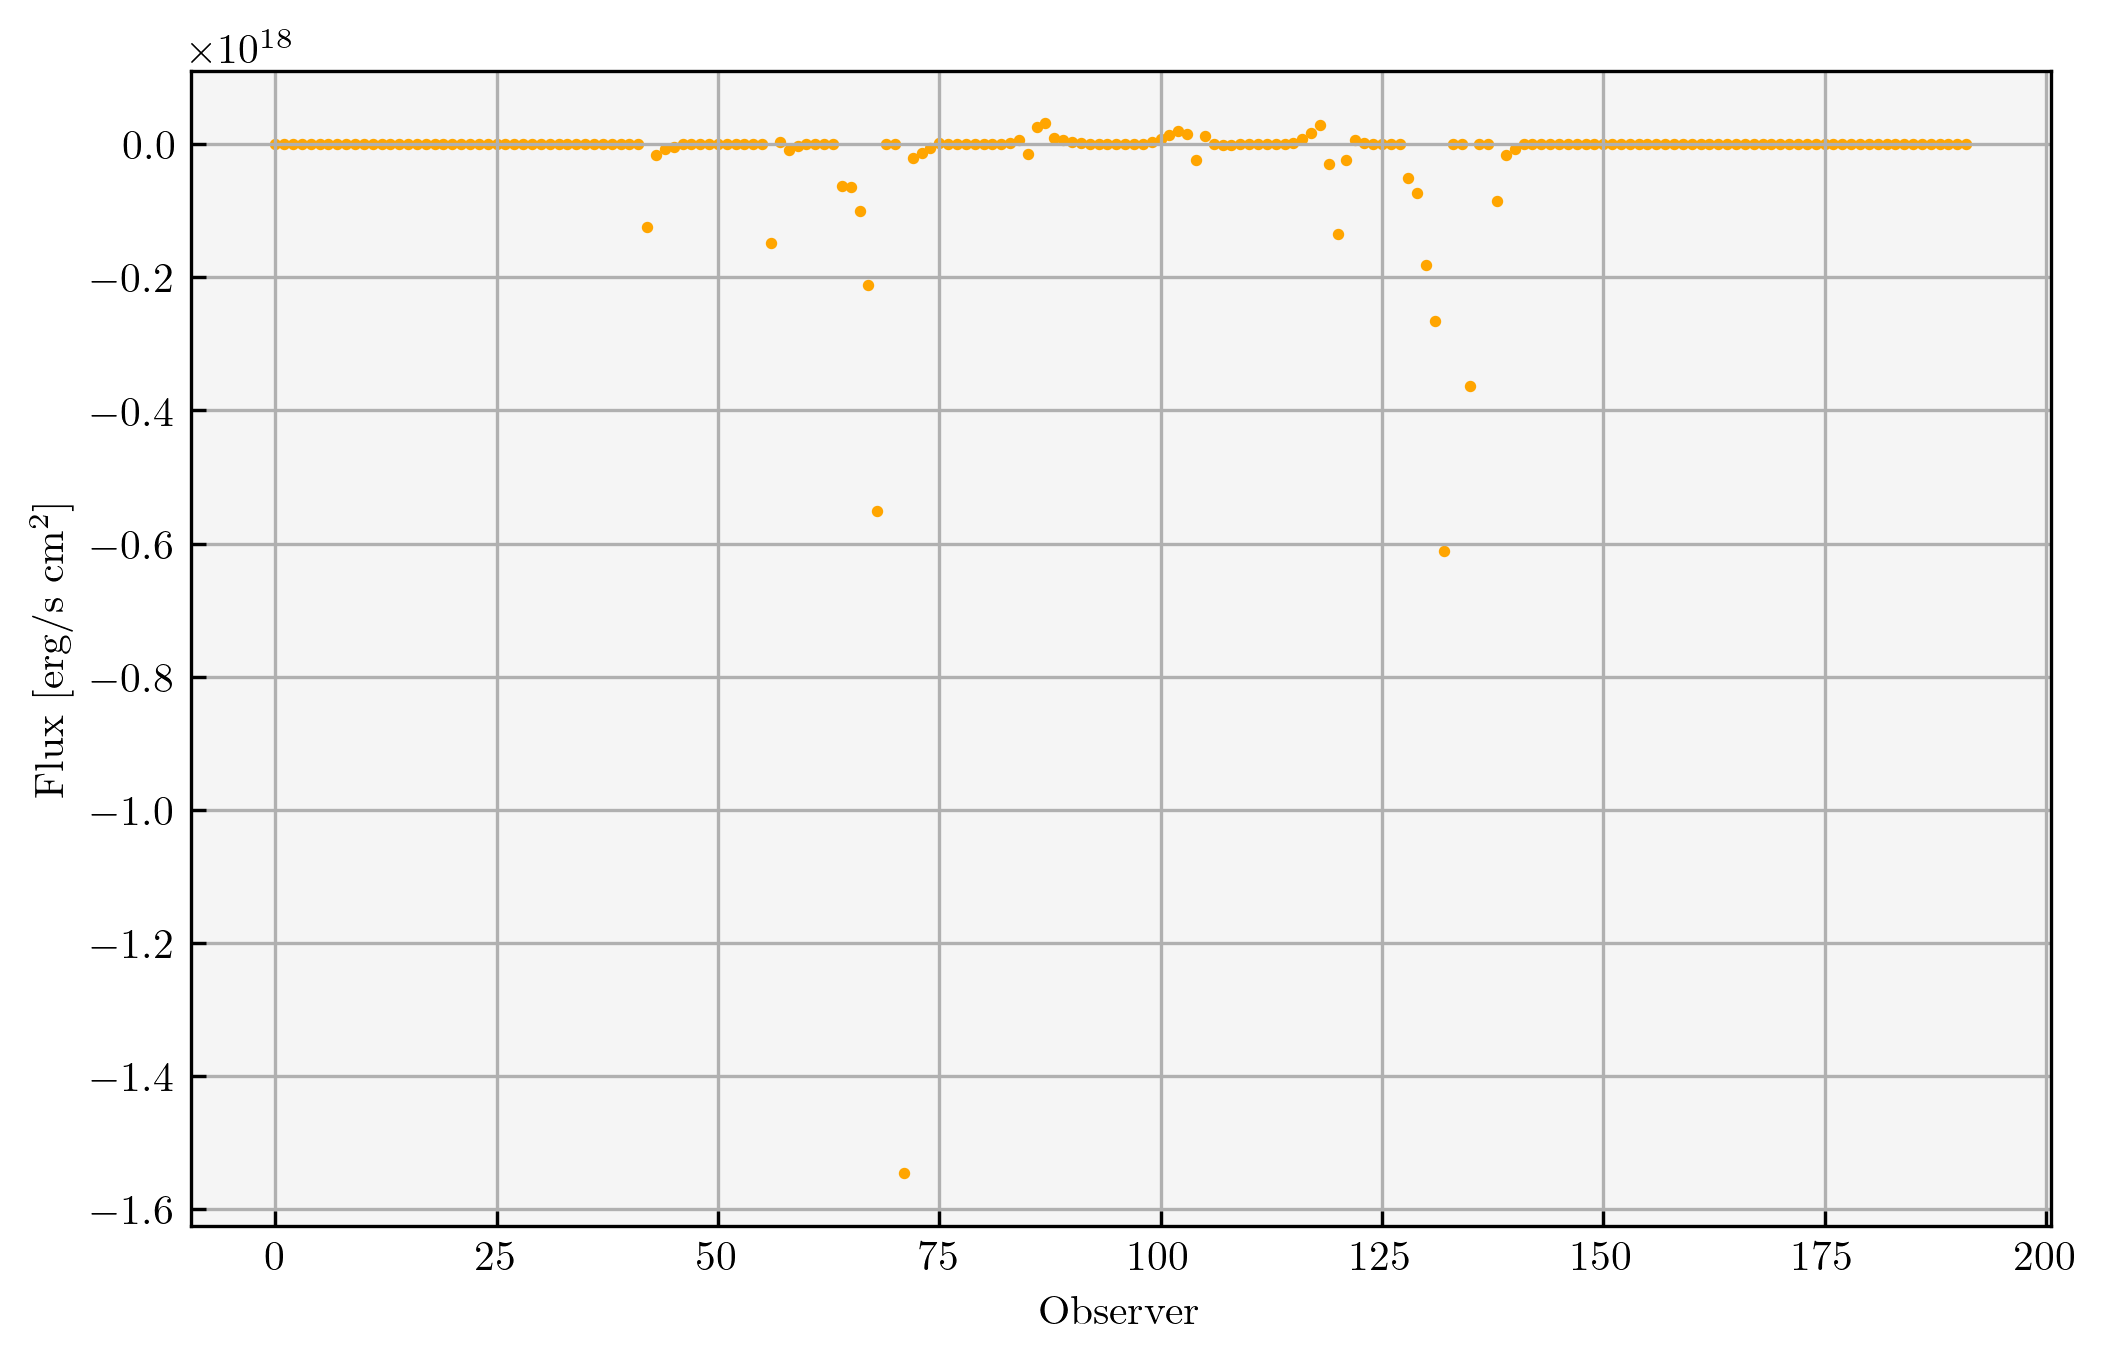

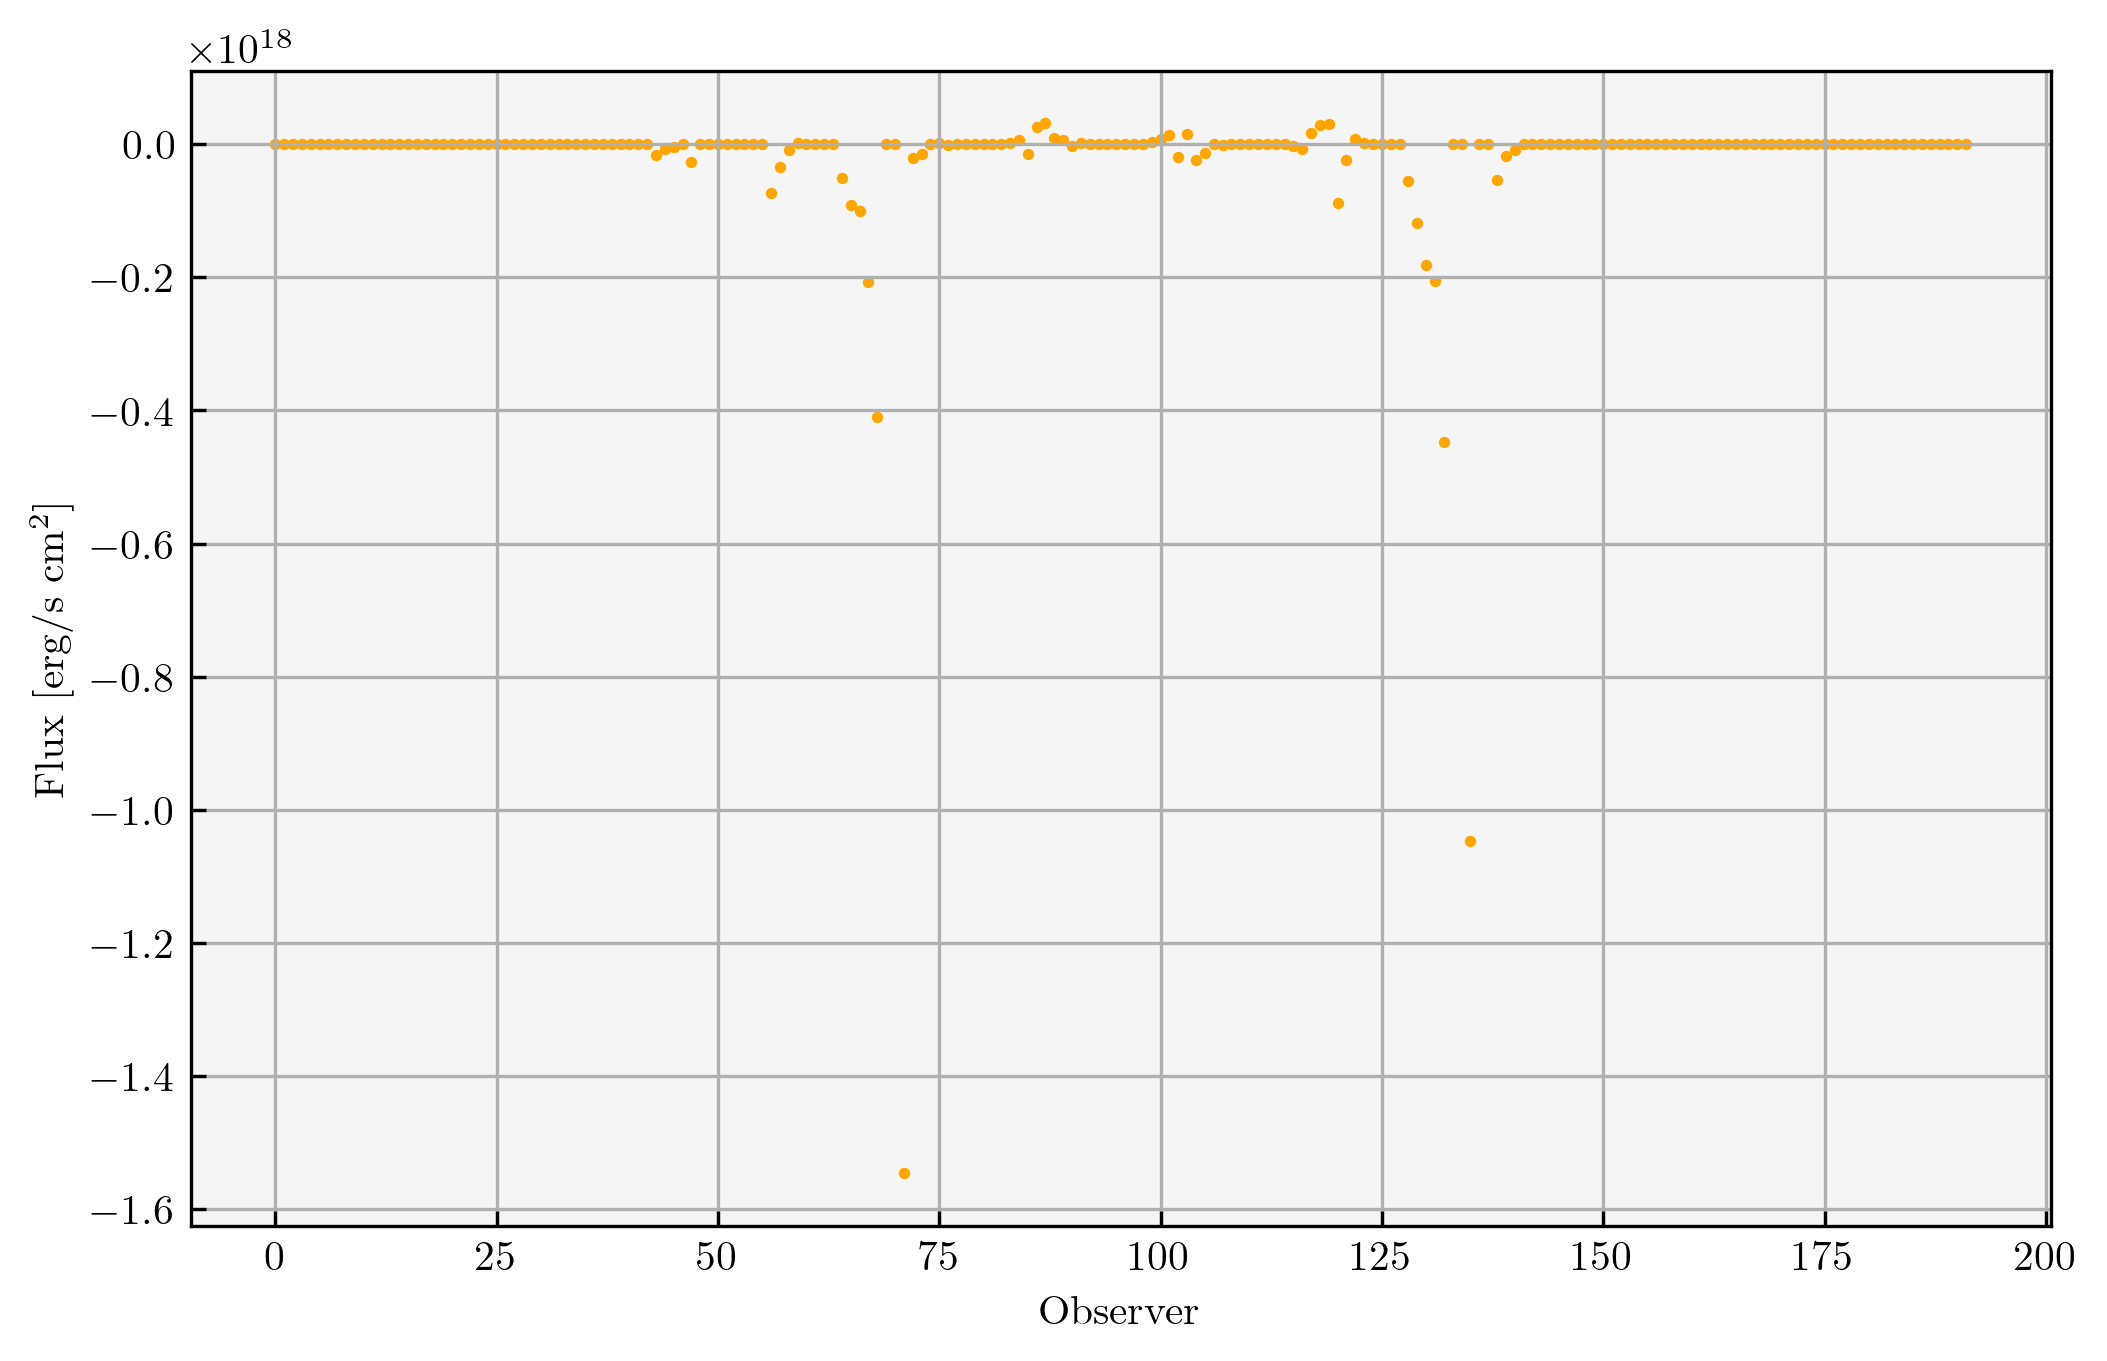

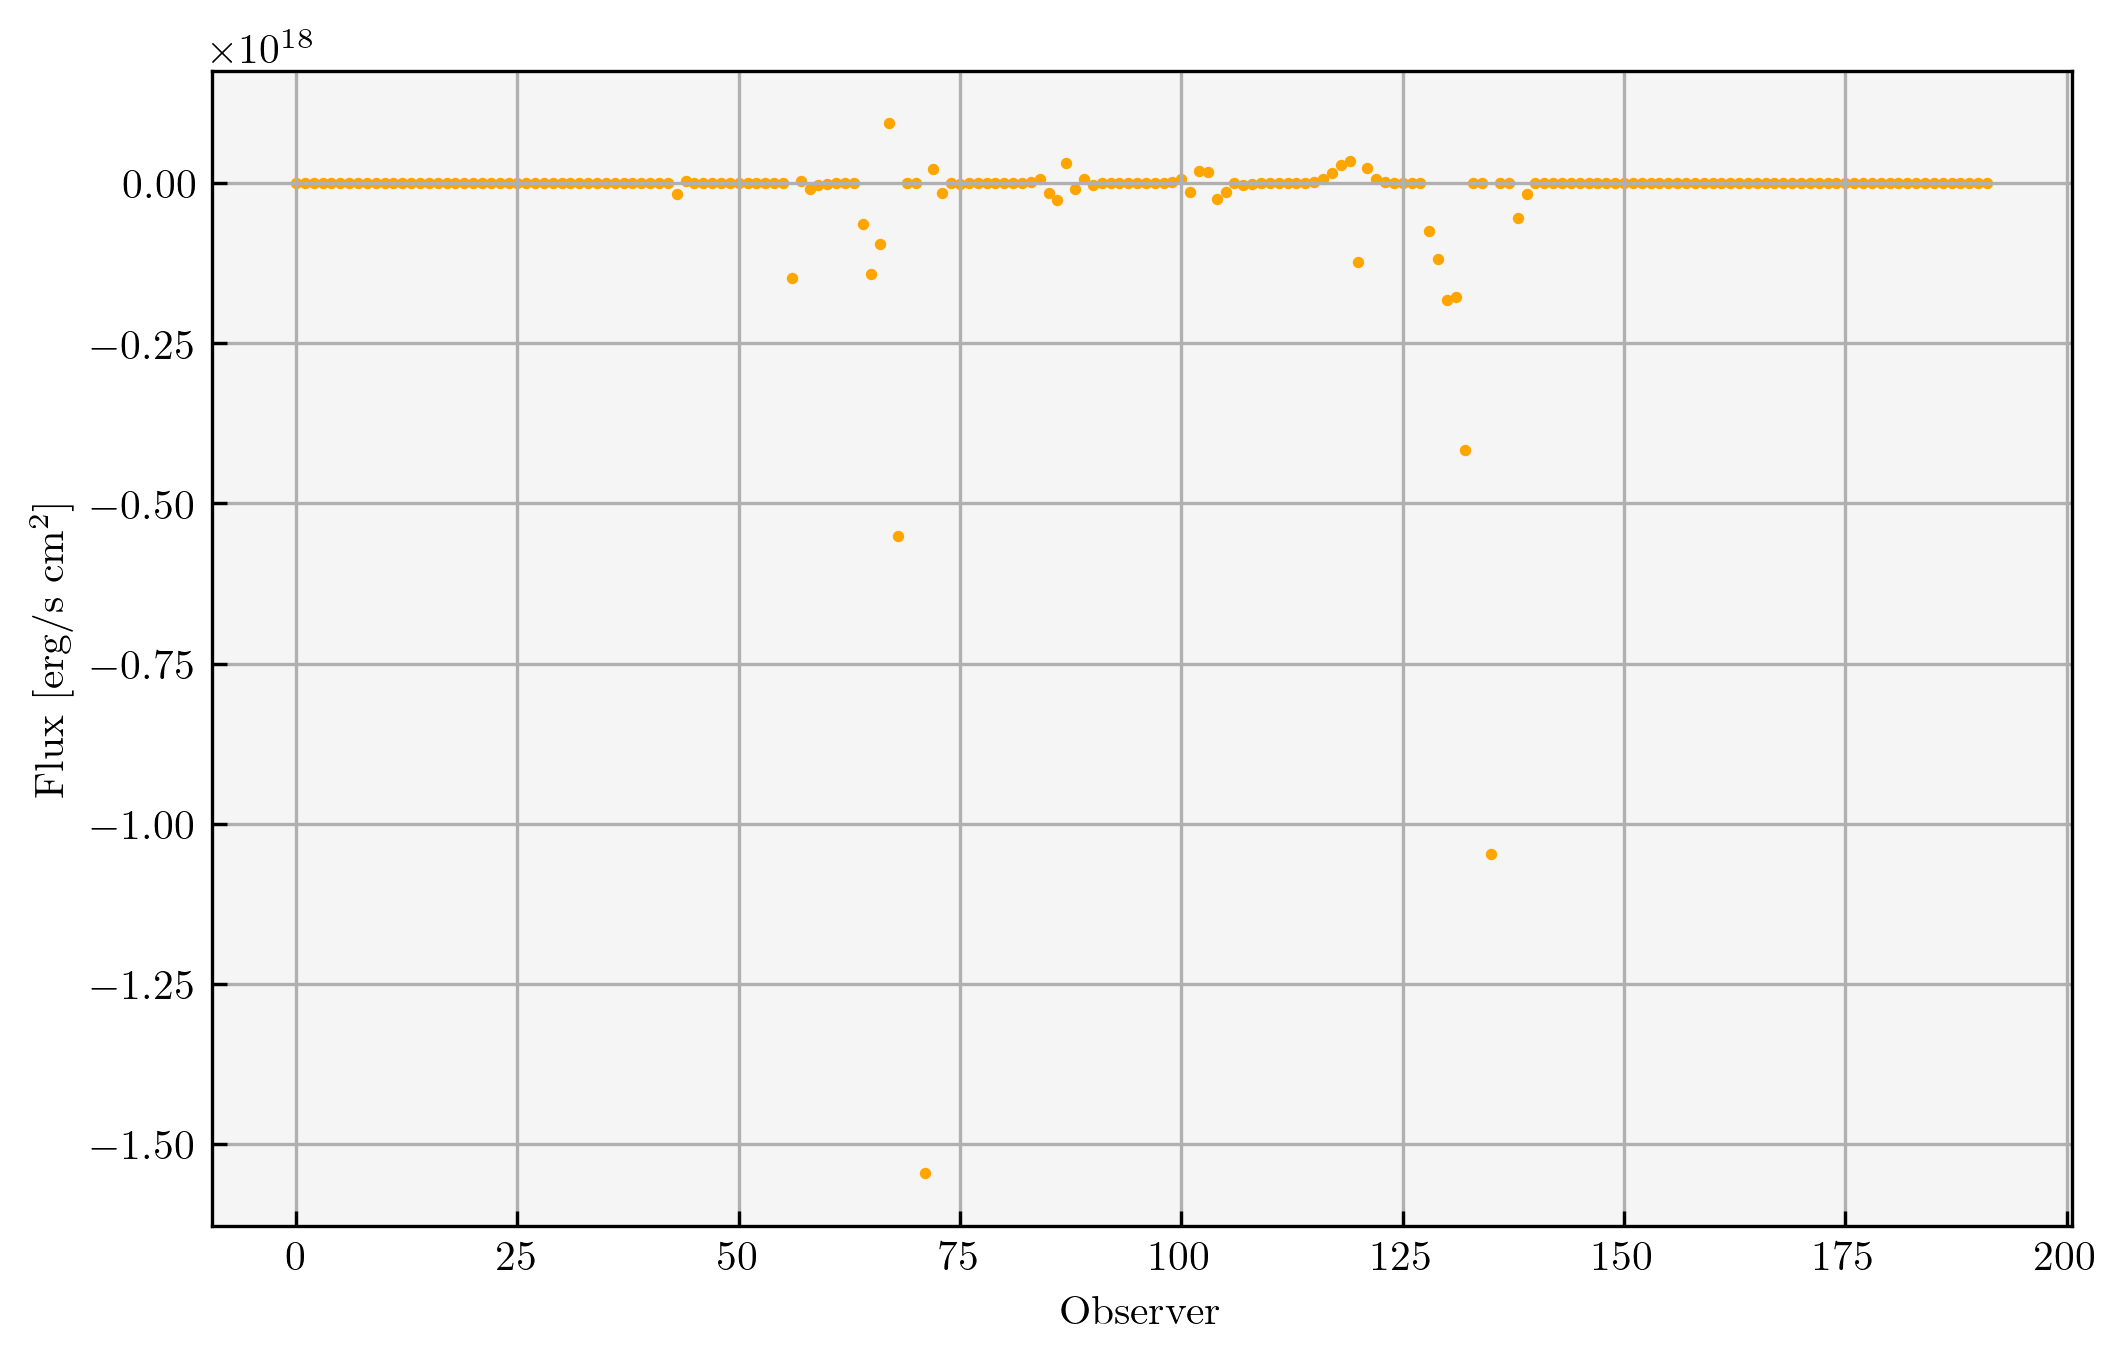

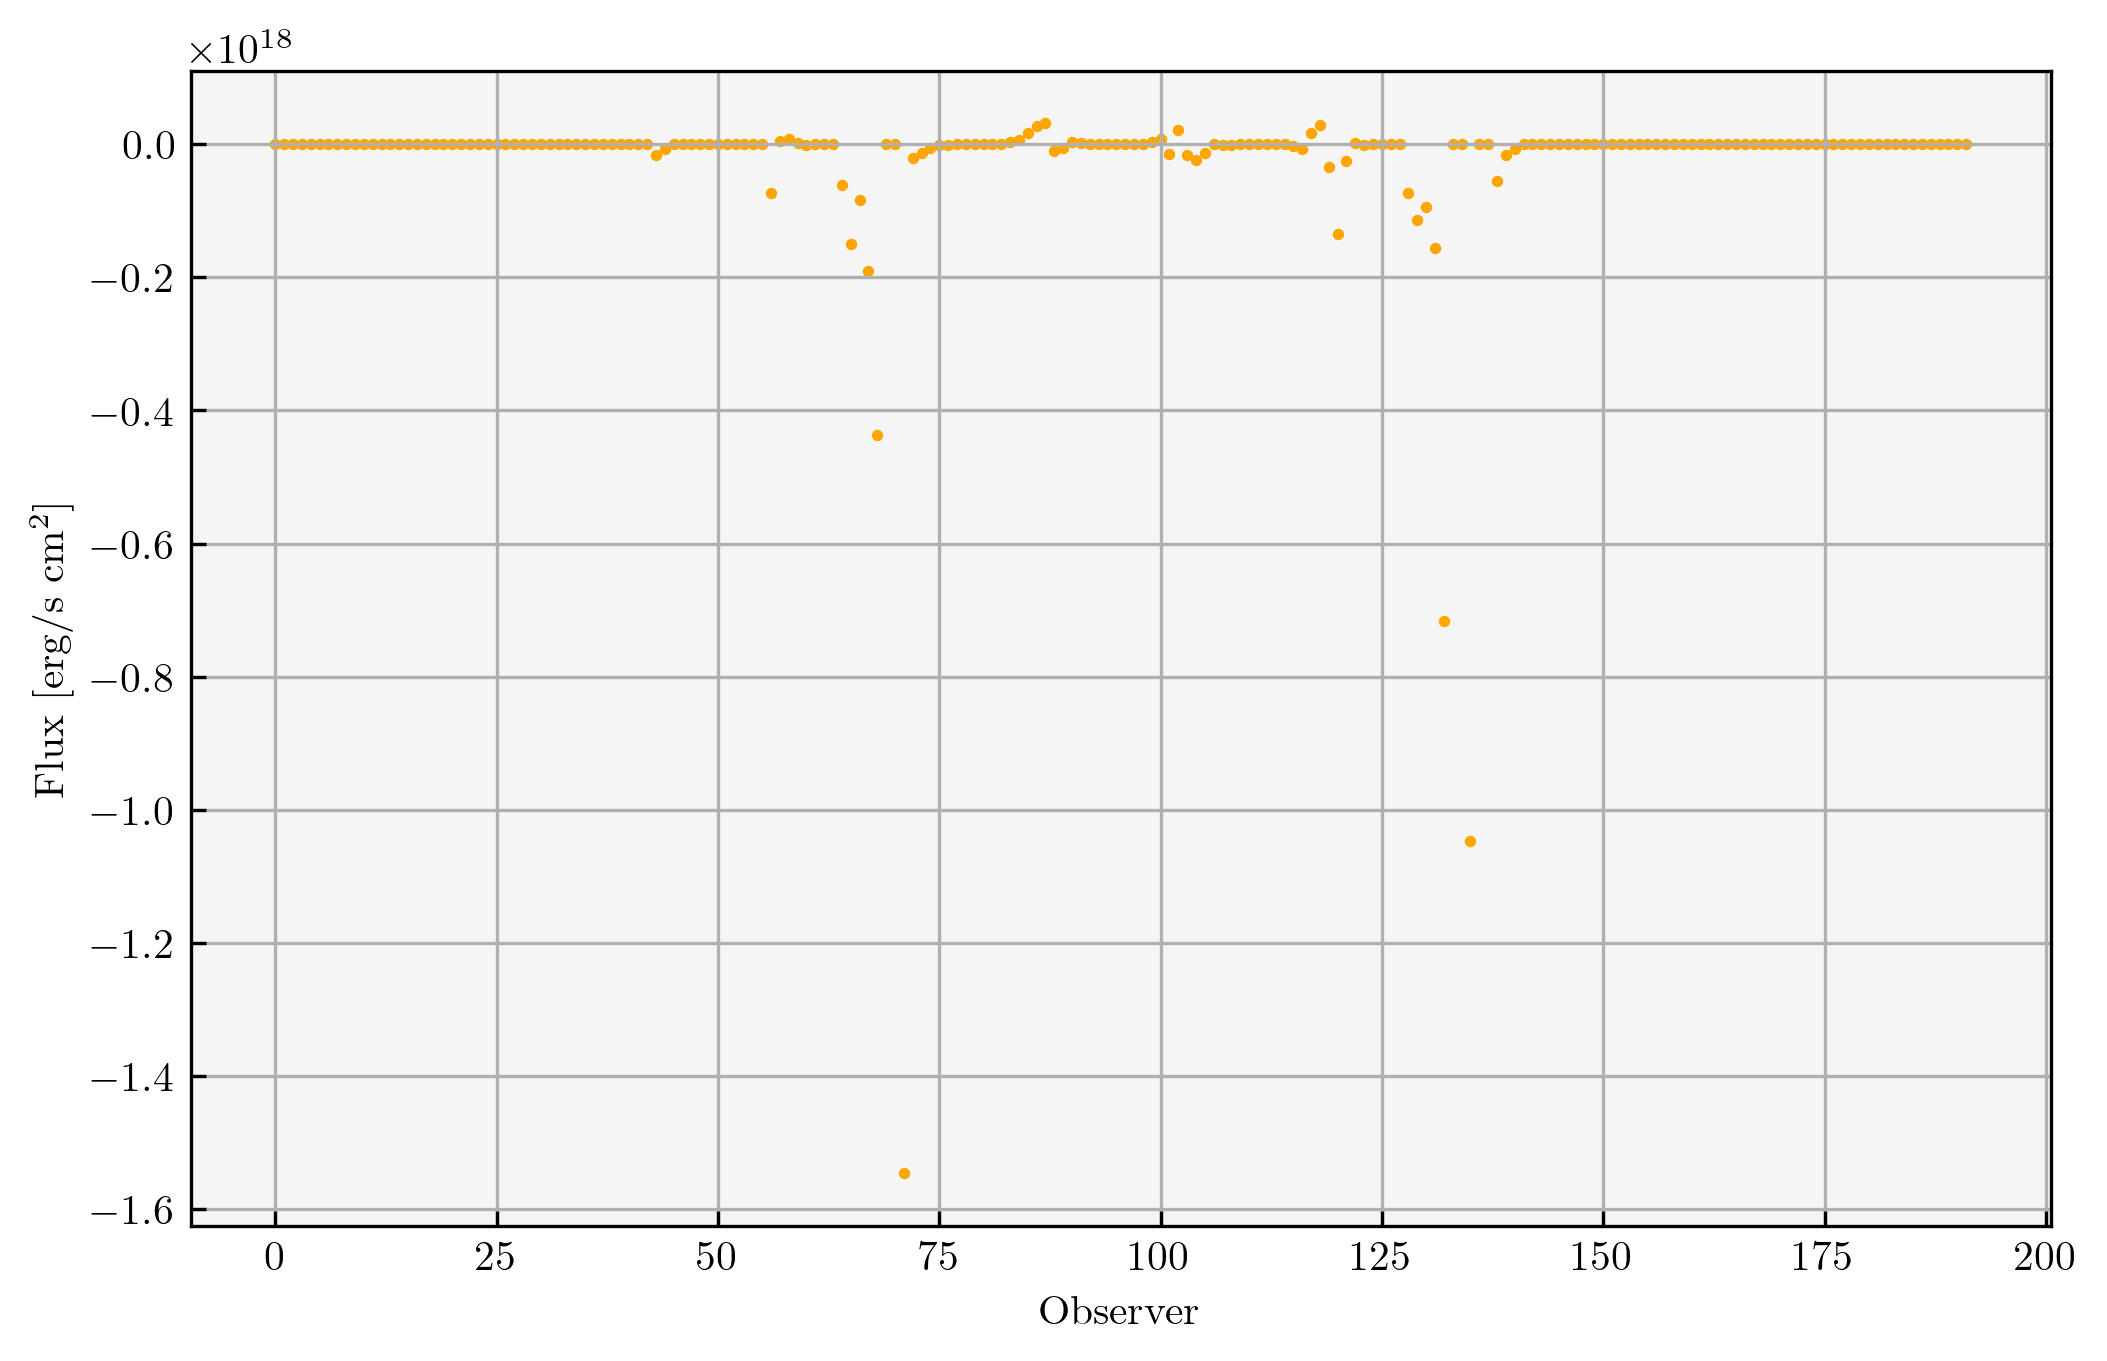

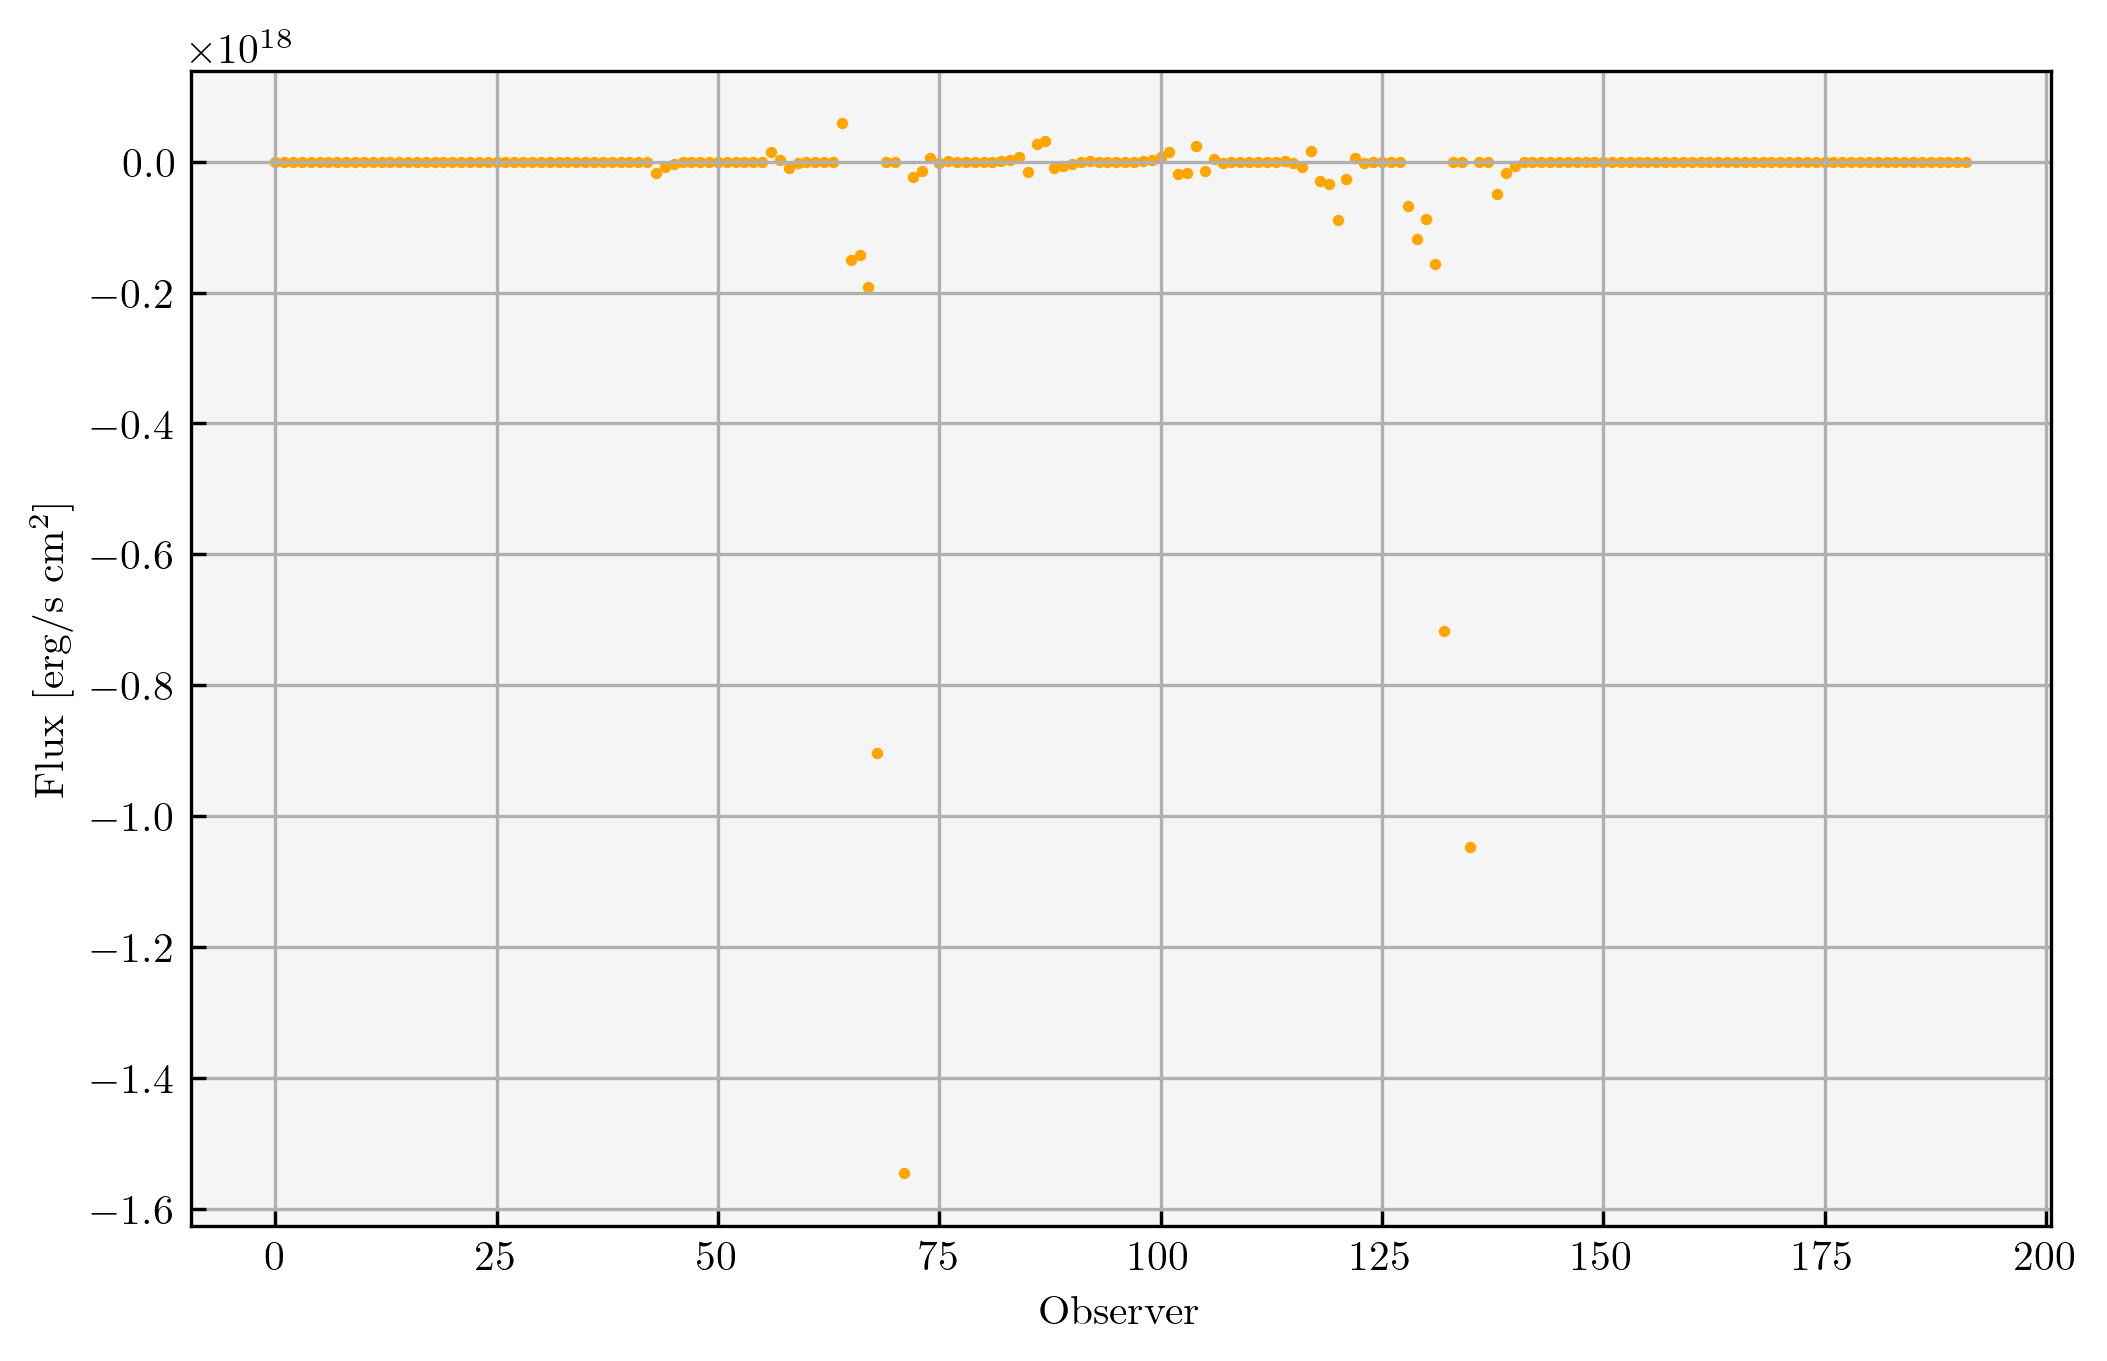

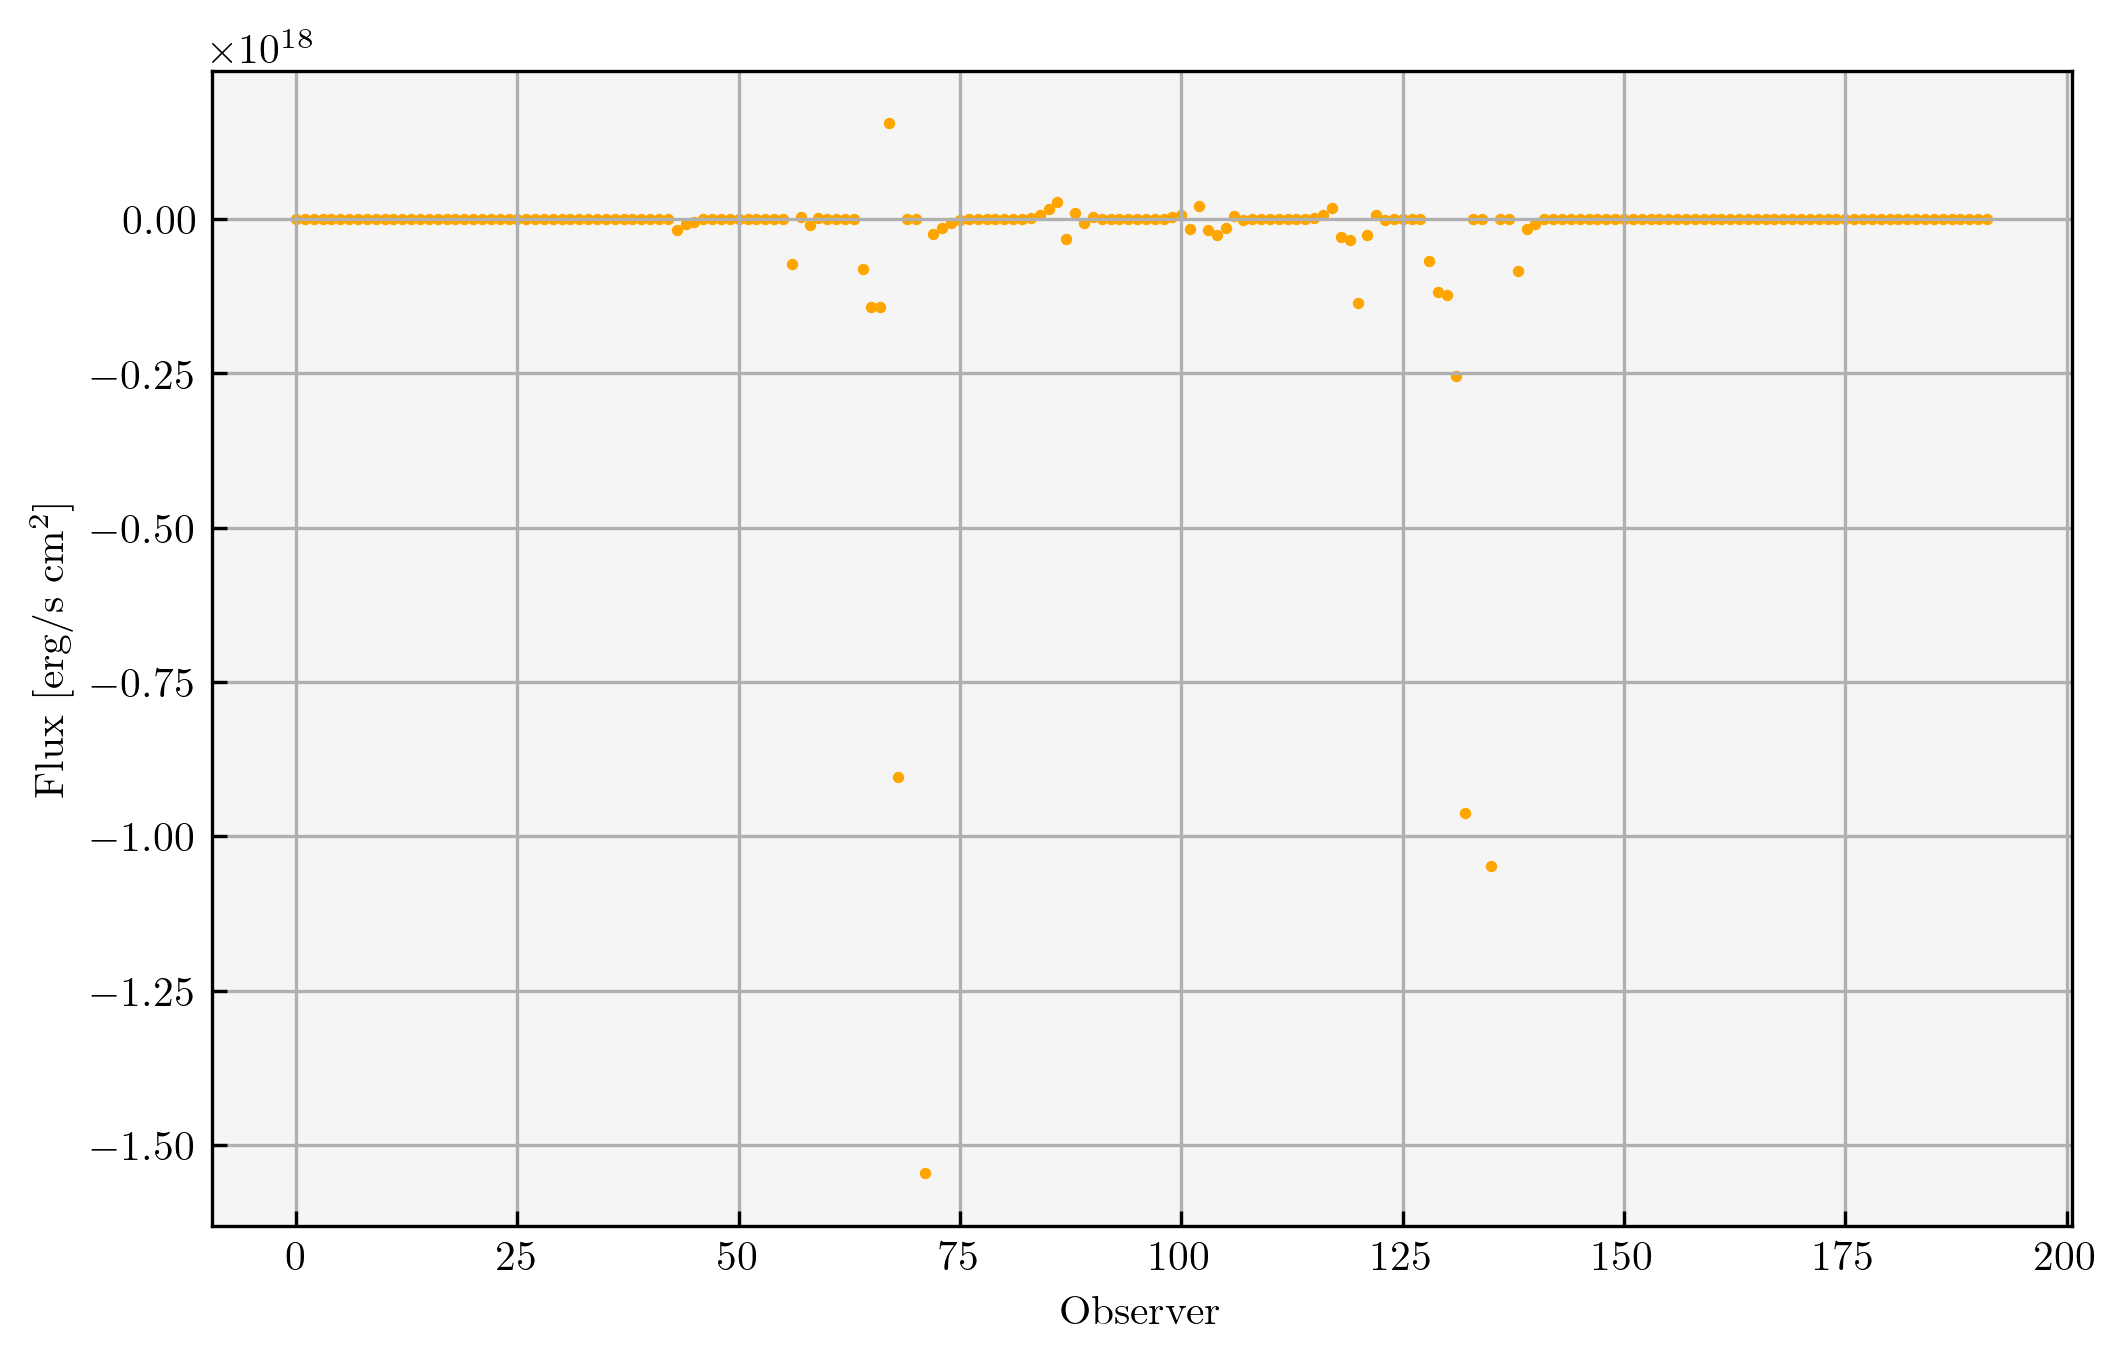

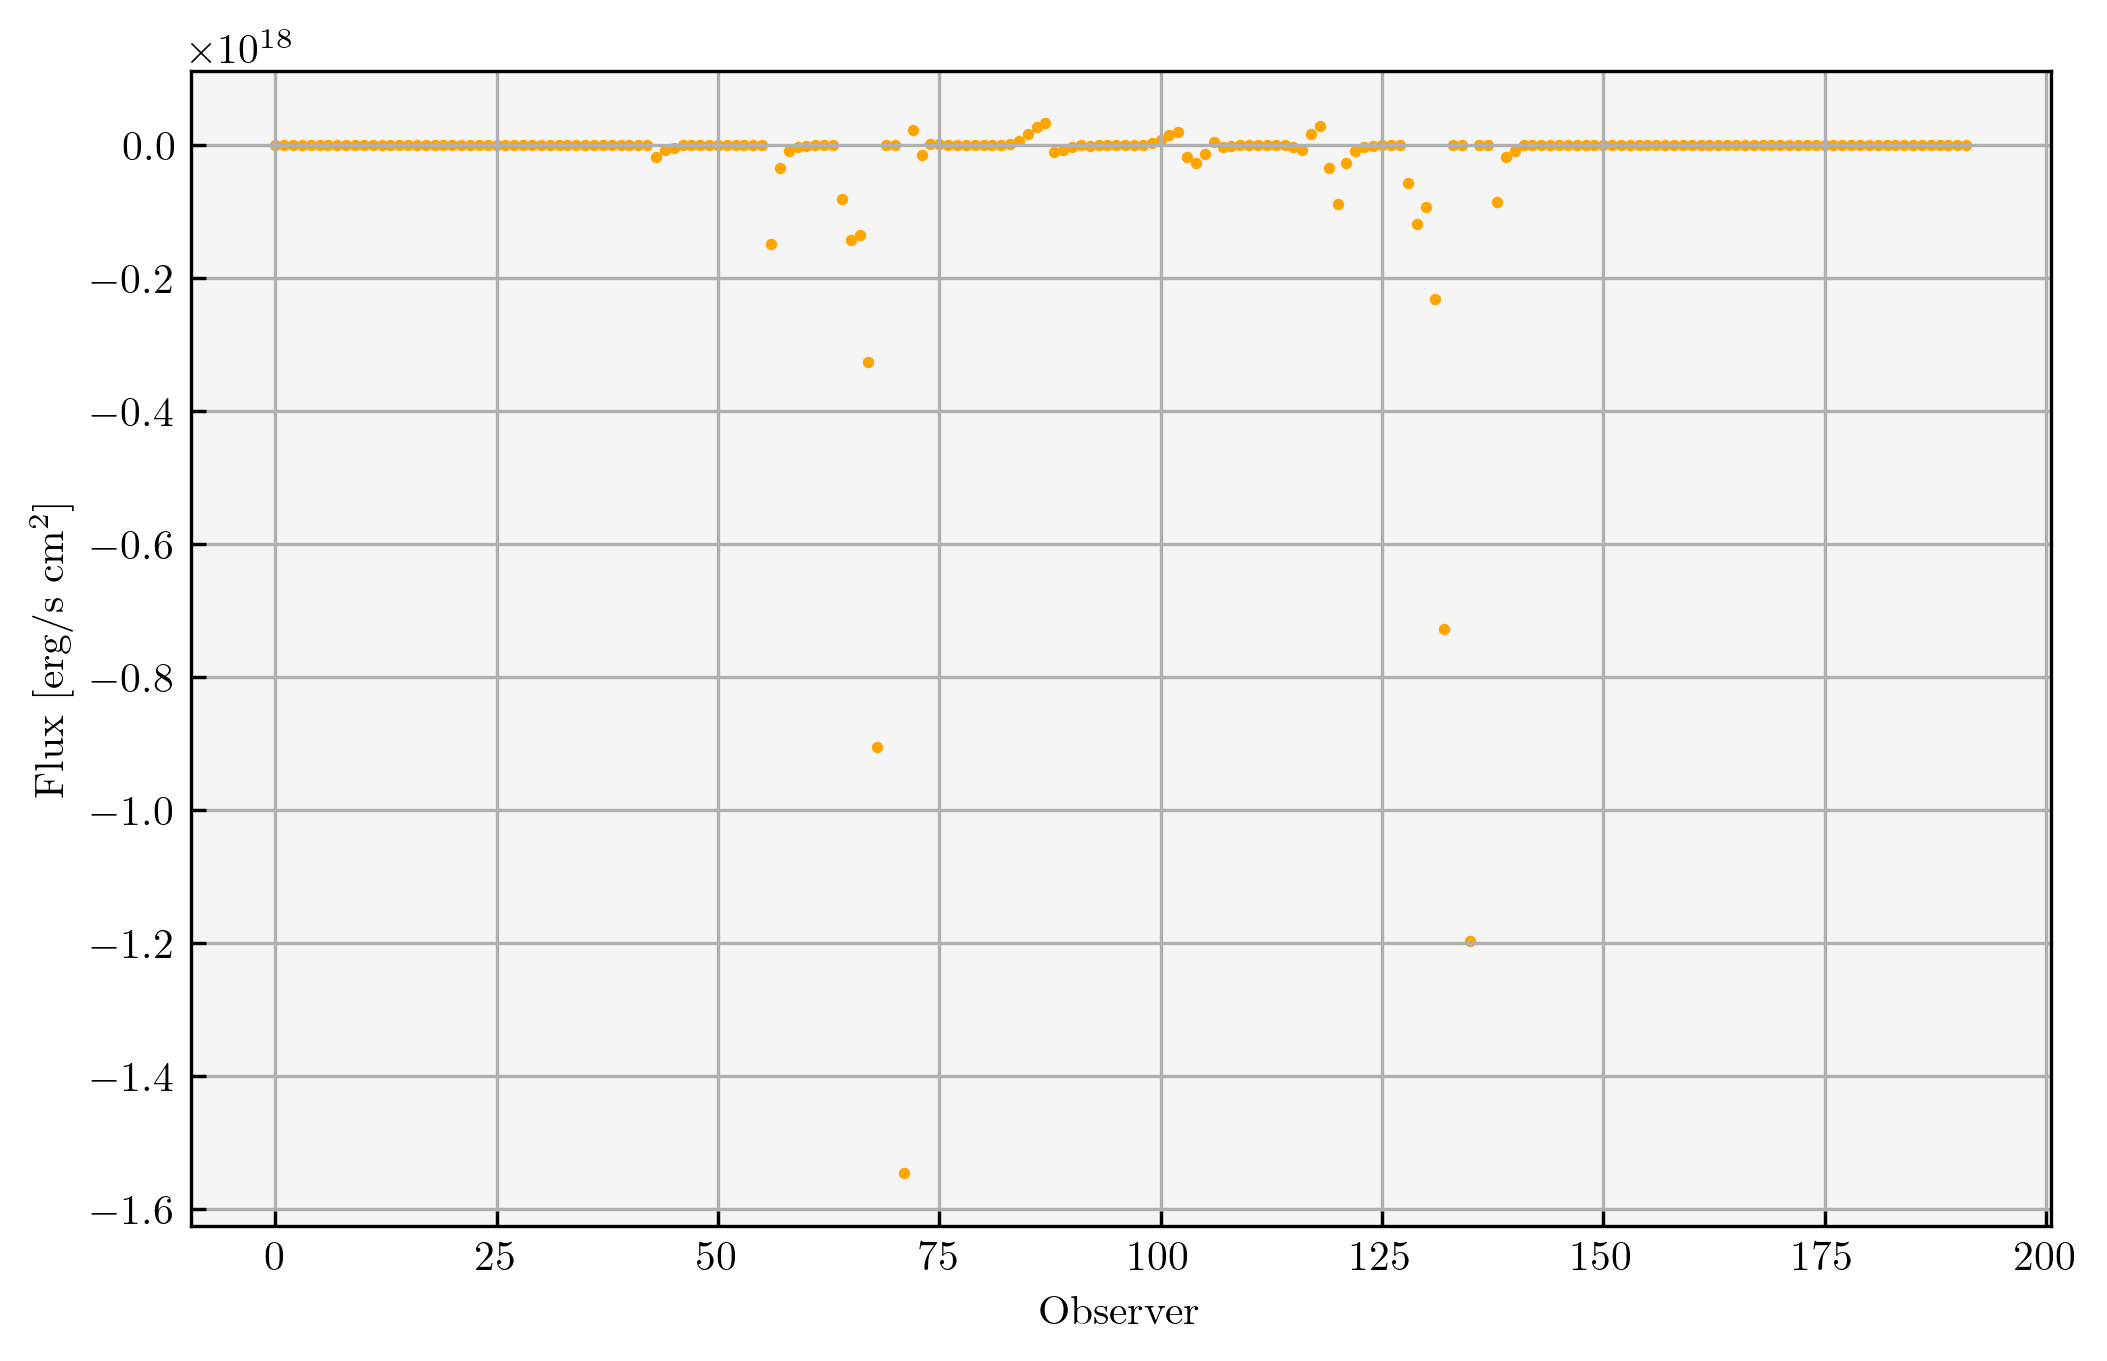

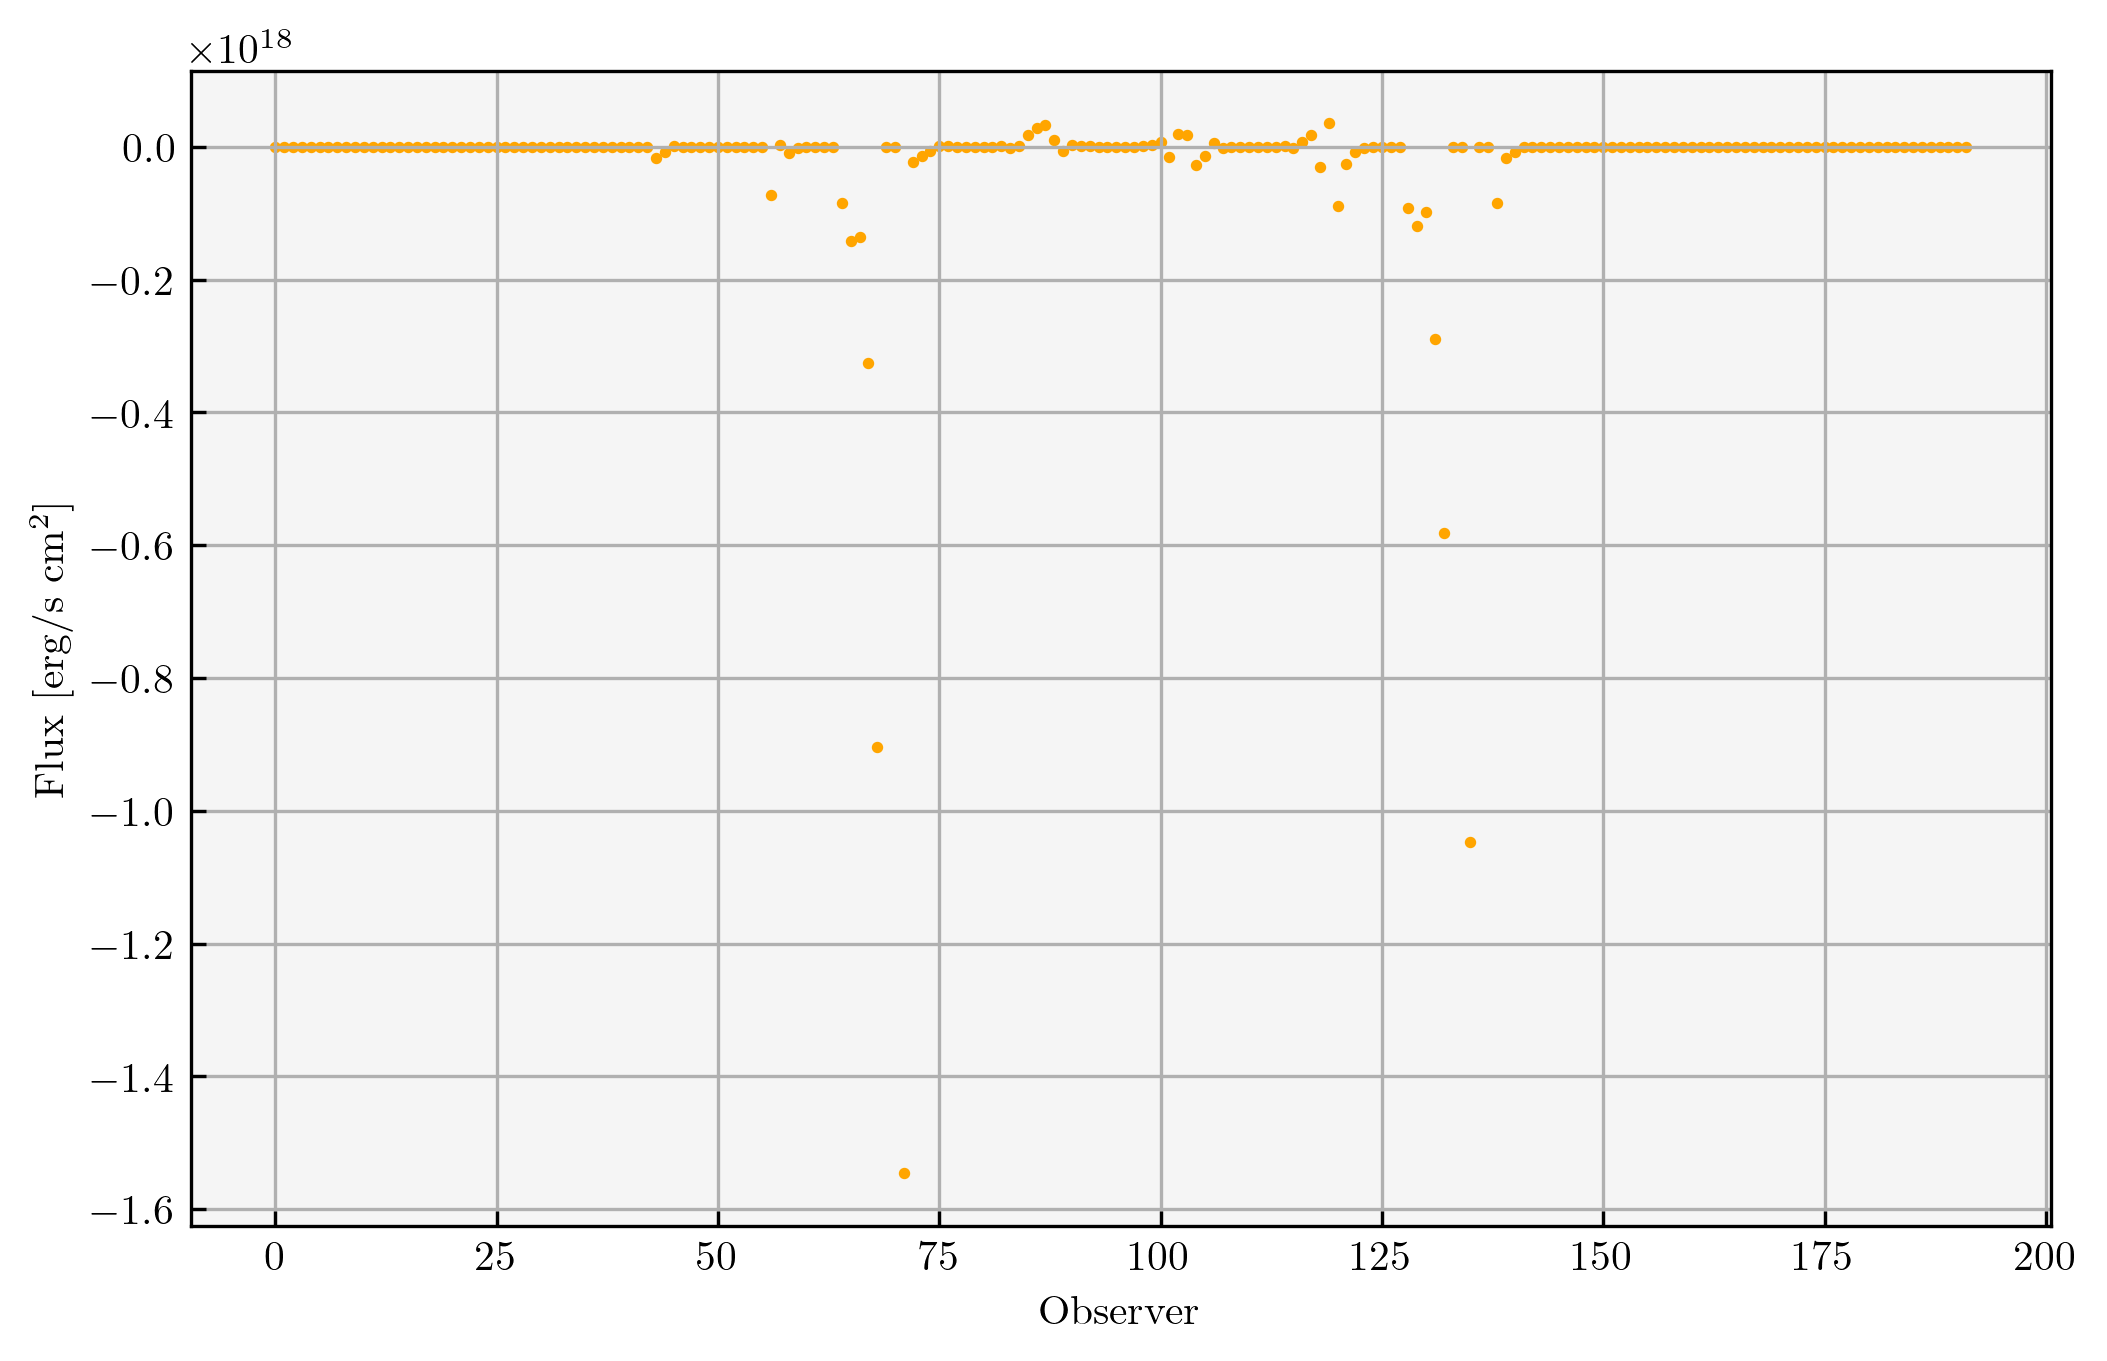

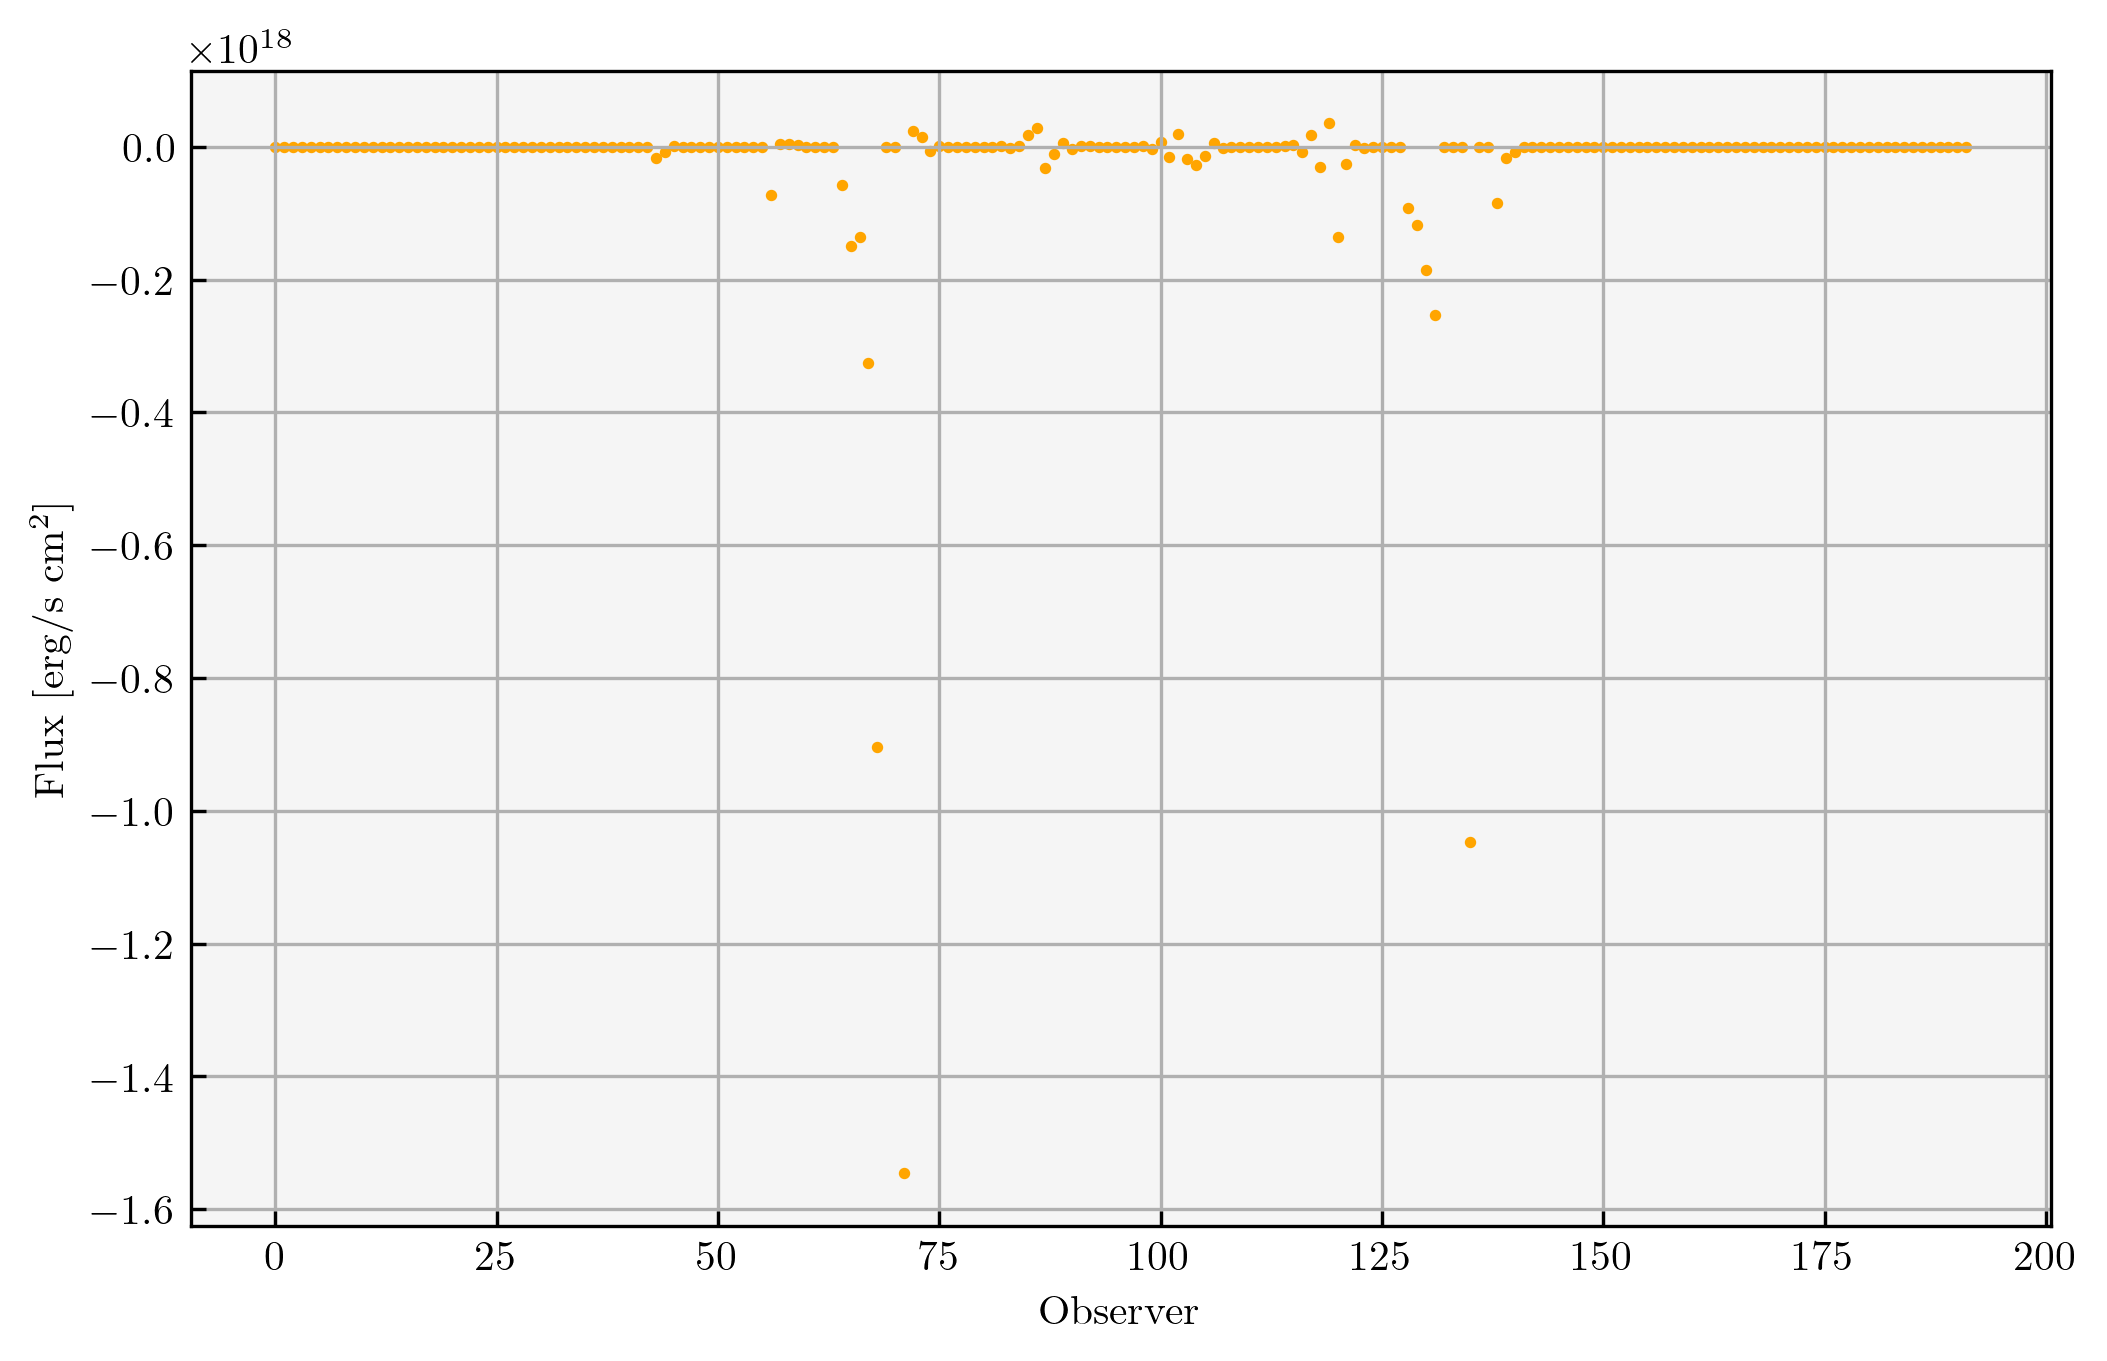

In [3]:
num_array = np.arange(900, 1600, 50)
lum_array = np.zeros(len(num_array))
photo_mean_aritarray = np.zeros(len(num_array))
photo_mean_geomarray = np.zeros(len(num_array))
for i, num in enumerate(num_array):
    print('num', num)
    lum, sphere_radius = doer_of_thing(fix, m, num)
    sphere_radius = np.array(sphere_radius)
    sphere_radius /=  6.957e10
    lum_array[i] = lum
    photo_mean_aritarray[i] = np.mean(sphere_radius)
    photo_mean_geomarray[i] = gmean(sphere_radius)

In [4]:
with open('data/NEWconvergence_test' + str(fix) + '.txt', 'a') as f:
    f.write('#num \n')
    f.write(' '.join(map(str,num_array)) + '\n')
    f.write('#R_ph arit mean \n')
    f.write(' '.join(map(str, photo_mean_aritarray)) + '\n')
    f.write('#R_ph geom mean \n')
    f.write(' '.join(map(str, photo_mean_geomarray)) + '\n')
    f.write('#Lum \n')
    f.write(' '.join(map(str, lum_array)) + '\n')
    f.close()

In [15]:
start = 0.5 * Rt
stop = 10_000 #400 * Rt
log_start = np.log10(start)
log_stop = np.log10(stop)
spacing = np.zeros(len(num_array)) #step in logspace
diff_aritarray = np.zeros(len(num_array)) #cell around R_ph mean
diff_geomarray = np.zeros(len(num_array)) #cell around R_ph mean
for i,num in enumerate(num_array):
    log_radii = np.linspace(log_start, log_stop, num) #simulator units
    spacing[i] = log_radii[1]-log_radii[0]
    
    radii = 10**log_radii
    diff_arit_idx = np.argmin(np.abs(photo_mean_aritarray[i]-radii))
    diff_arit = radii[diff_arit_idx+1]-radii[diff_arit_idx]
    diff_aritarray[i] = diff_arit

    diff_geom_idx = np.argmin(np.abs(photo_mean_geomarray[i]-radii))
    diff_geom = radii[diff_geom_idx+1]-radii[diff_geom_idx]
    diff_geomarray[i] = diff_geom

In [16]:
spacing_plot = np.zeros(len(num_array))
for i,spa in enumerate(spacing):
    spacing_plot[i] = "{:.4f}".format(spa)

/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_11347/677772759.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(spacing_plot)


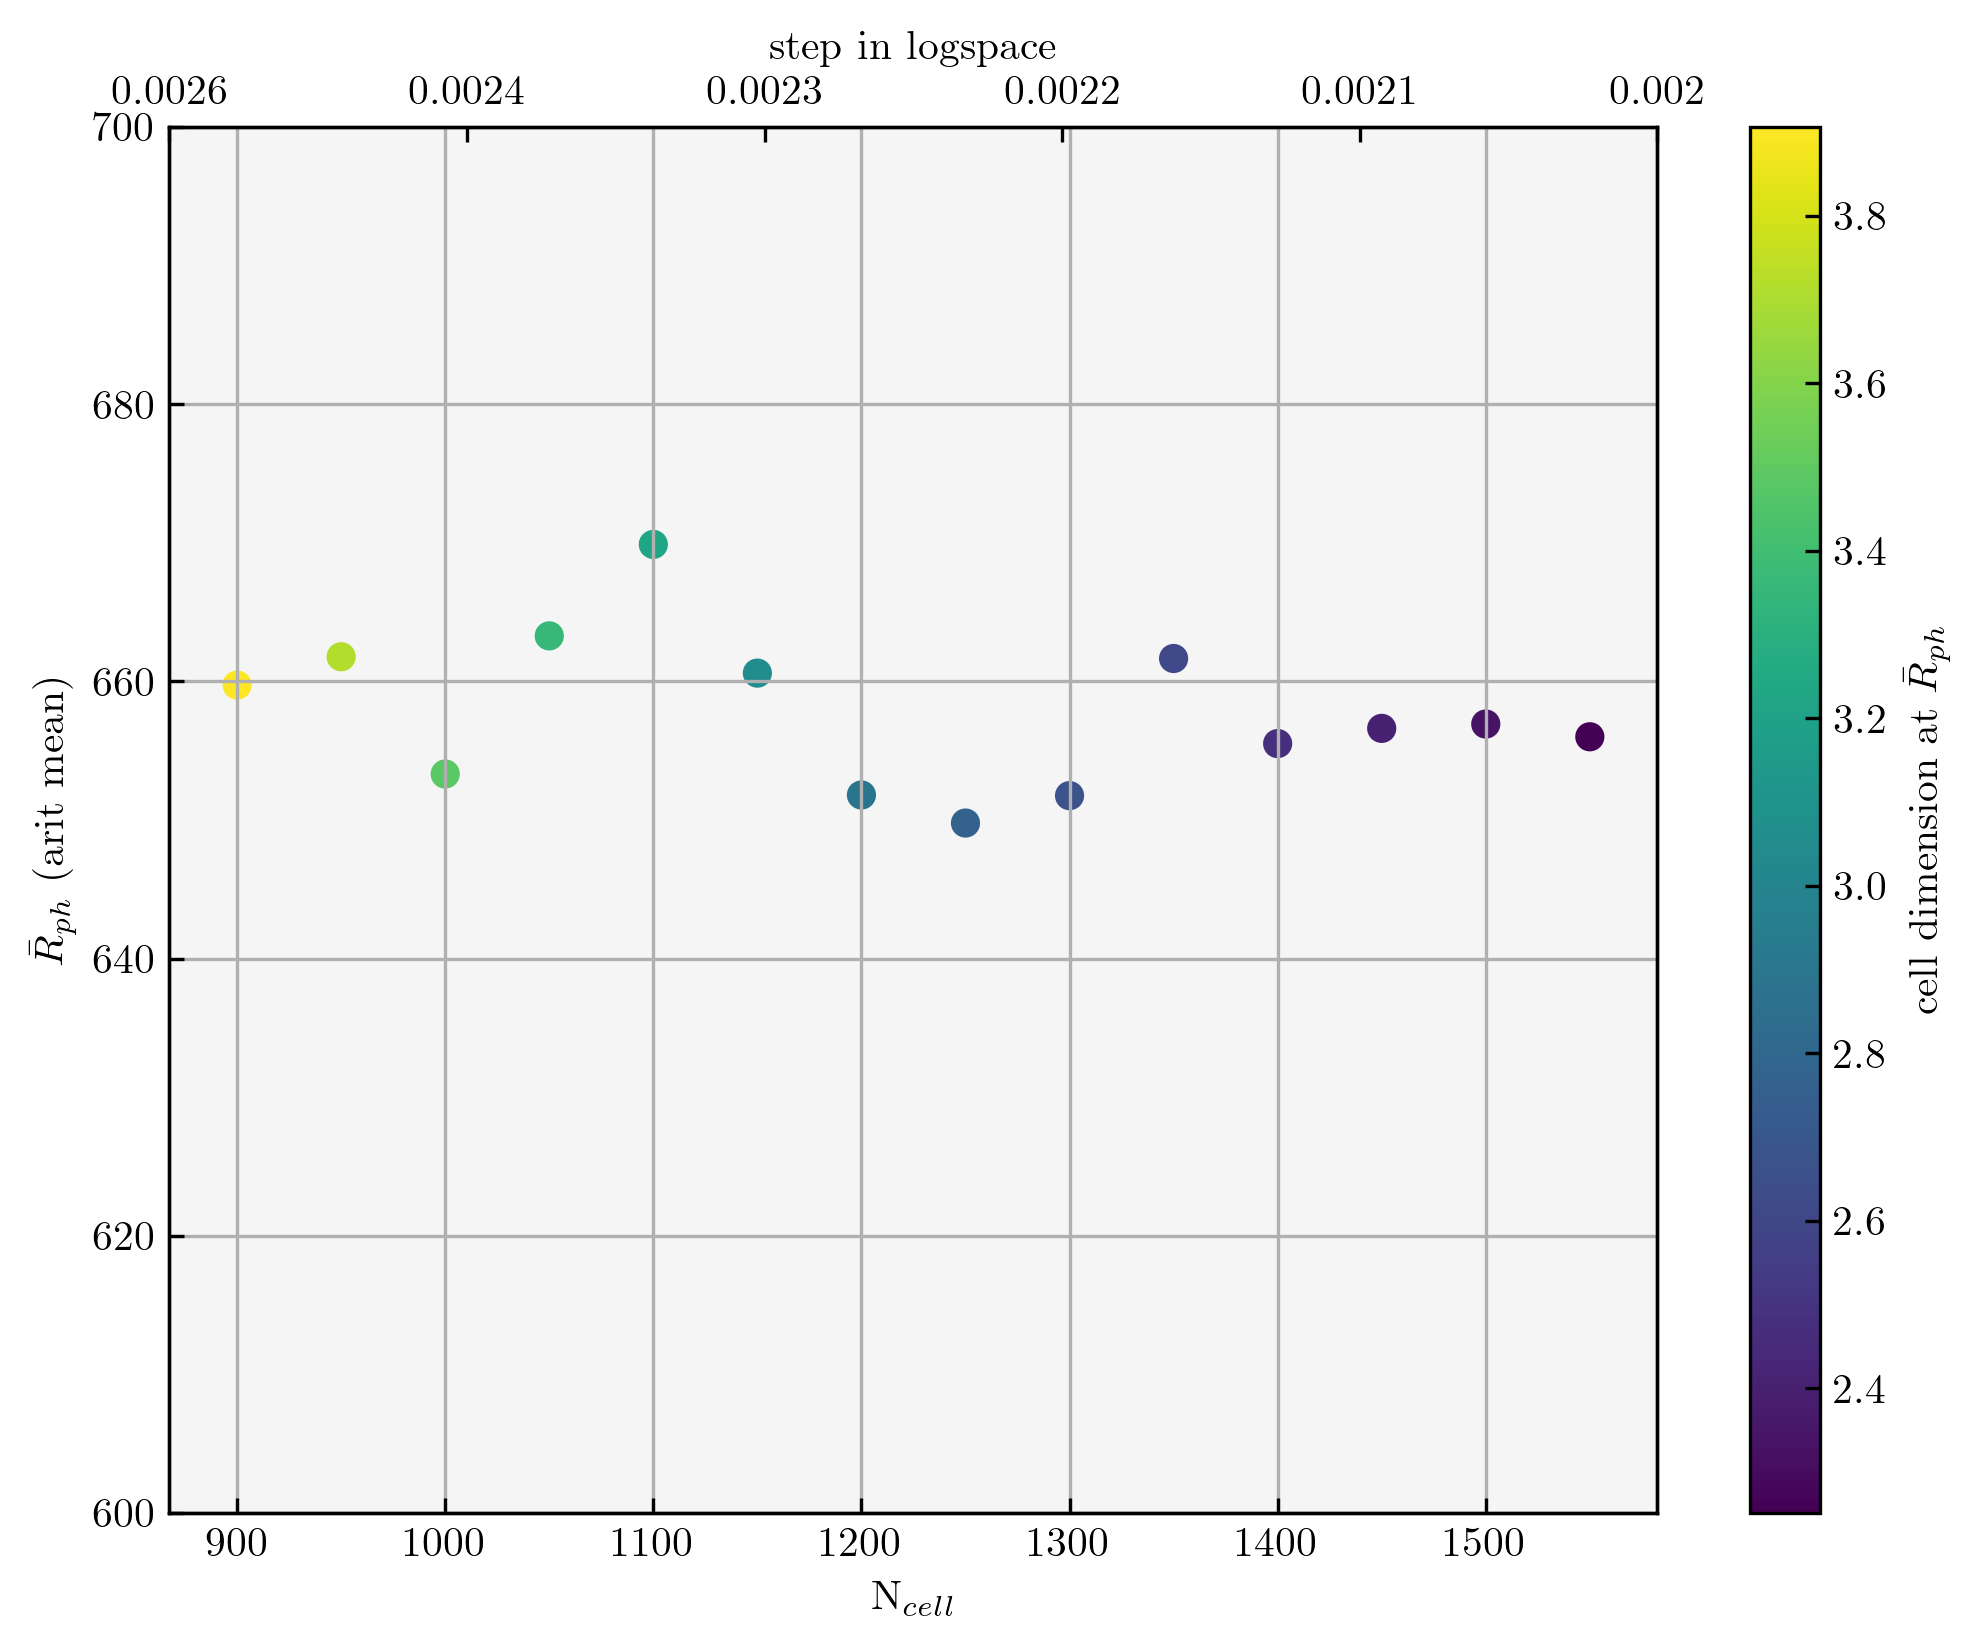

In [39]:
fig, ax1 = plt.subplots( figsize = (8,6) )
ax2 = ax1.twiny()
img = ax1.scatter(num_array, photo_mean_aritarray, c = diff_aritarray)
cbar = fig.colorbar(img)
cbar.set_label(r'cell dimension at $\bar{R}_{ph}$')
ax1.set_xlabel(r'N$_{cell}$')
ax1.set_ylabel(r'$\bar{R}_{ph}$ (arit mean)')
ax1.grid()
ax1.set_ylim(600, 700)
#plt.yscale('log')
ax2.set_xticklabels(spacing_plot)
ax2.set_xlabel('step in logspace ')
plt.savefig('Figs/convergence_aritphoto.png')

/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_11347/1570802657.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(spacing_plot)


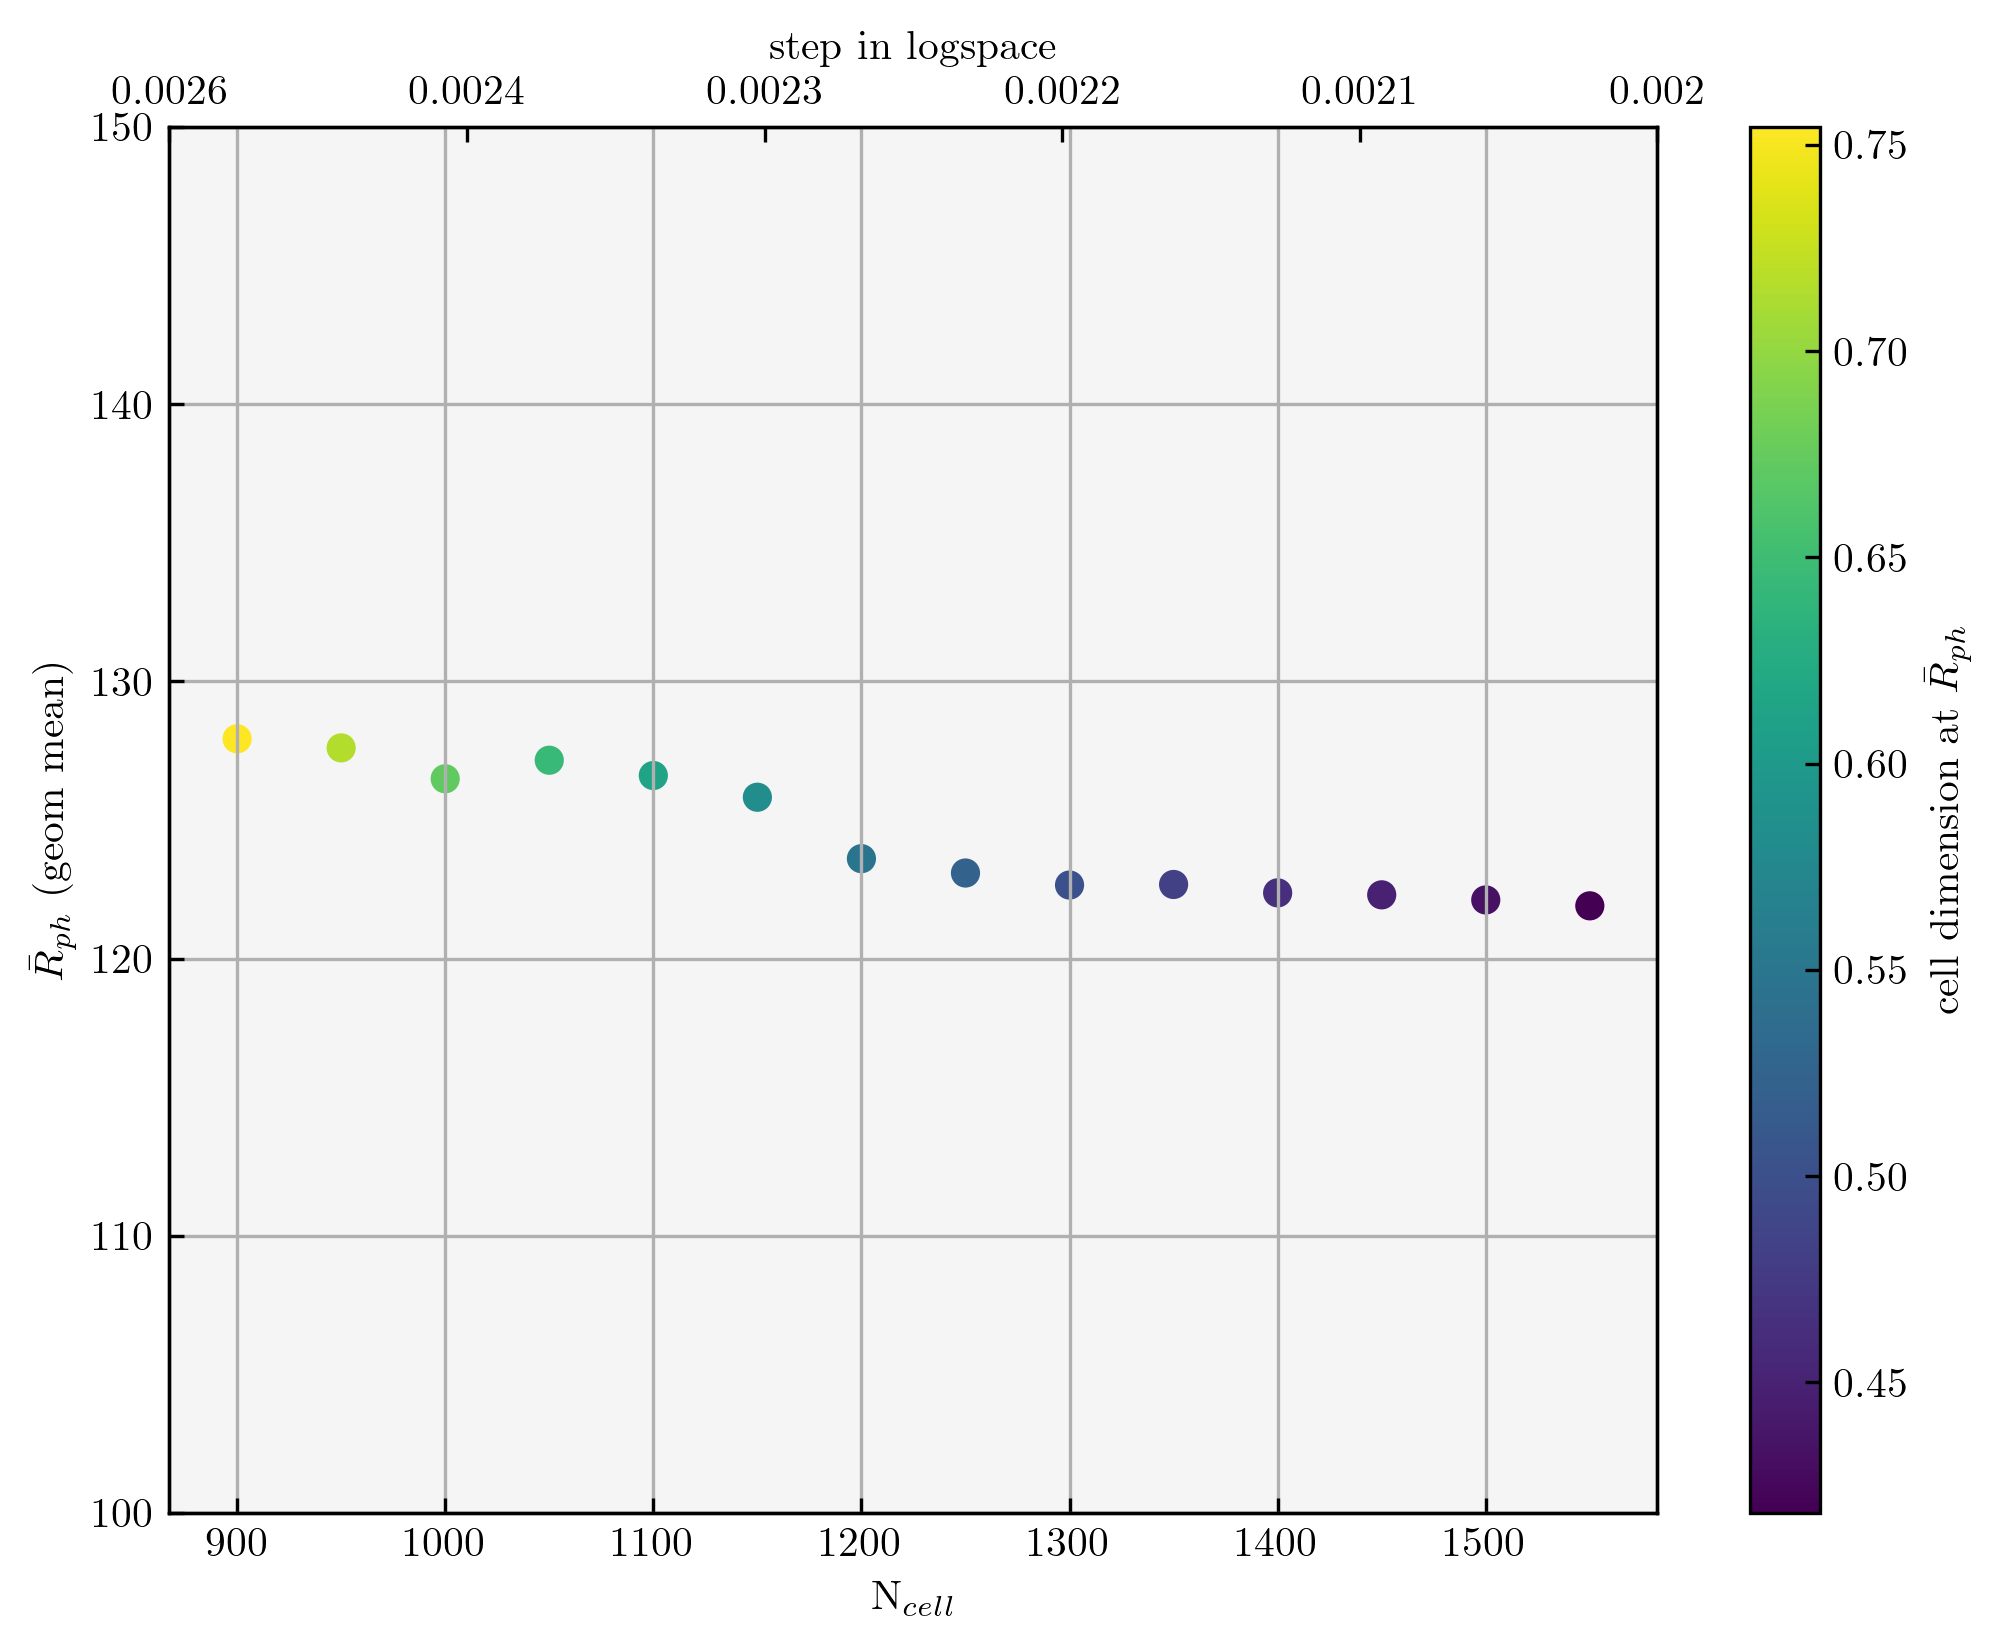

In [40]:
fig, ax1 = plt.subplots( figsize = (8,6) )
ax2 = ax1.twiny()
img = ax1.scatter(num_array, photo_mean_geomarray, c = diff_geomarray)
cbar = fig.colorbar(img)
cbar.set_label(r'cell dimension at $\bar{R}_{ph}$')
ax1.set_xlabel(r'N$_{cell}$')
ax1.set_ylabel(r'$\bar{R}_{ph}$ (geom mean)')
ax1.grid()
ax1.set_ylim(100, 150)
#plt.yscale('log')
ax2.set_xticklabels(spacing_plot)
ax2.set_xlabel('step in logspace ')
plt.savefig('Figs/convergence_geomphoto.png')

/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_11347/1462429855.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(spacing_plot)


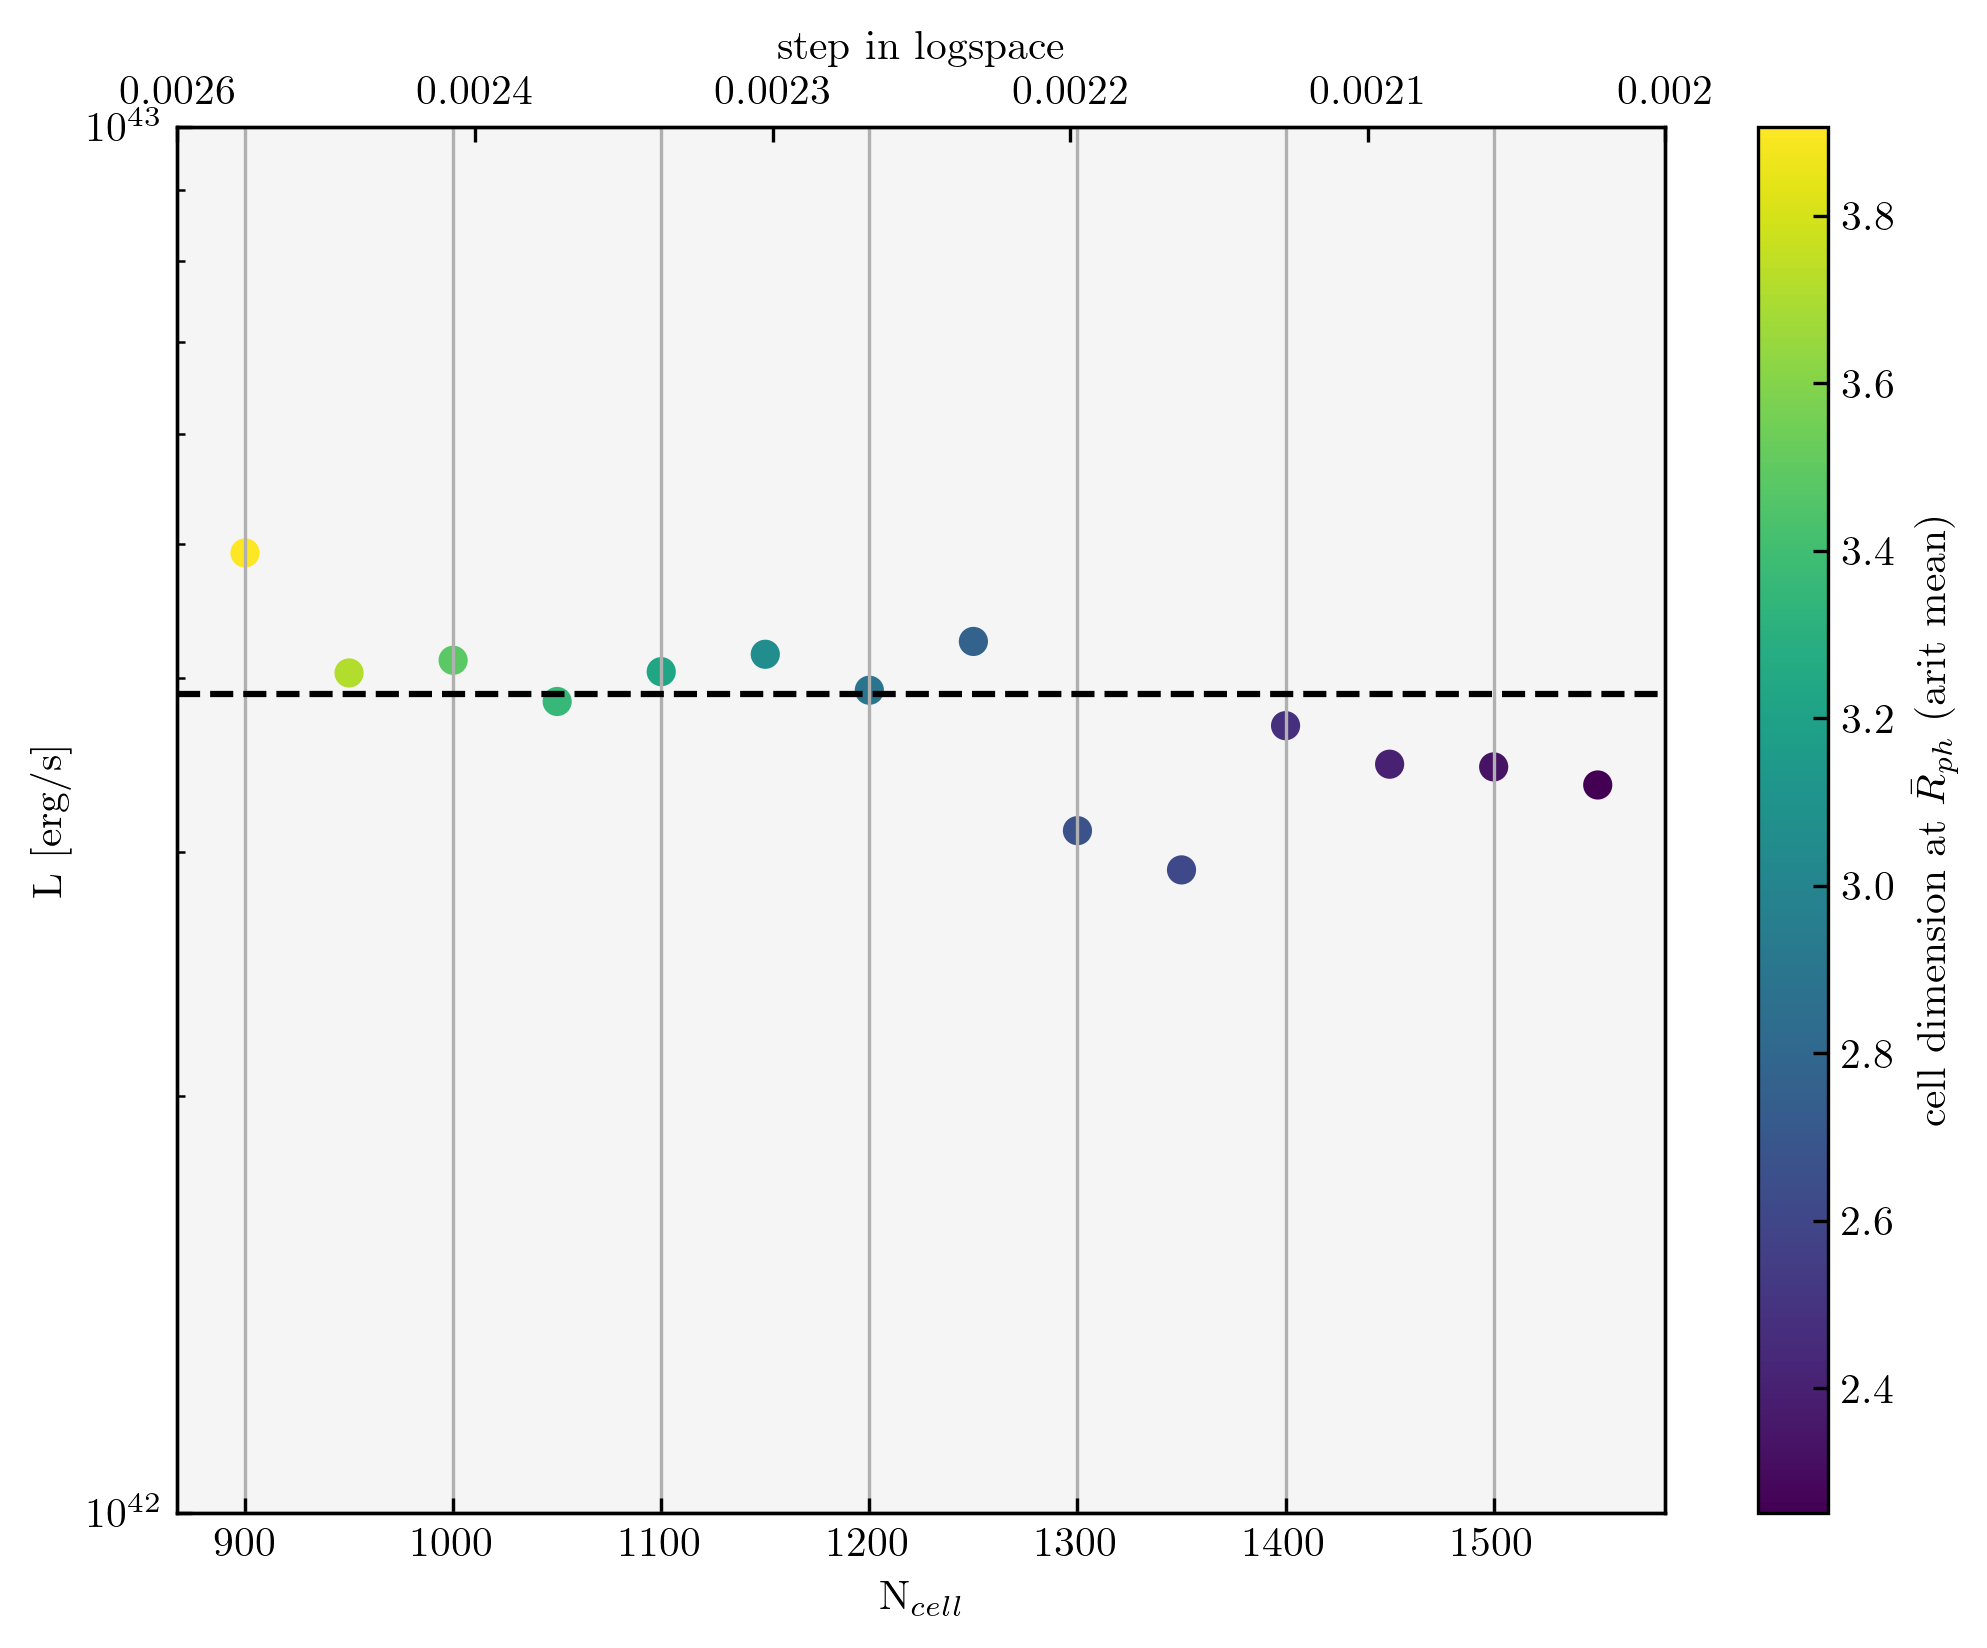

In [41]:
value_elad_844 = 3.9e42
fig, ax1 = plt.subplots( figsize = (8,6) )
ax2 = ax1.twiny()
img = ax1.scatter(num_array, lum_array, c = diff_array)
cbar = fig.colorbar(img)
cbar.set_label(r'cell dimension at $\bar{R}_{ph}$ (arit mean)')
ax1.axhline(value_elad_844, c = 'k', linestyle = 'dashed', label = 'Steinberg&Stone')
ax1.set_xlabel(r'N$_{cell}$')
ax1.set_ylabel(r'L [erg/s]')
ax1.set_yscale('log')
ax1.set_ylim(1e42, 1e43)
ax2.set_xticklabels(spacing_plot)
ax2.set_xlabel('step in logspace')
#ax2.set_yscale('log')
ax1.grid()
#ax1.legend()
plt.savefig('Figs/convergence_lum.png')

In [3]:
rays_T_test, rays_den_test, _, radii_test = ray_maker(fix, m, 1200)
_, _, photo = get_photosphere(rays_T_test, rays_den_test, radii_test)

/Users/paolamartire/miniconda3/envs/tde_comparison/lib/python3.9/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'observers' of function 'THROUPLE_S_CASTERS'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "src/Calculators/legion_of_casters.py", line 12:
@numba.njit
def THROUPLE_S_CASTERS(radii, R,
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


In [4]:
delta1200 = np.zeros(len(rays_T_test))
for i in range(len(rays_T_test)):
    ph = photo[i]
    i_photo = np.argmin(np.abs(ph-radii_test))
    delta1200[i] = (radii_test[i_photo+1]-radii_test[i_photo])/6.957e10

In [28]:
mean_1200 = np.mean(photo)
i_mean = np.argmin(np.abs(mean_1200-radii_test))
diffmean1200 = (radii_test[i_mean+1]-radii_test[i_mean])/6.957e10

In [46]:
flux = np.loadtxt('data/flux_m6.txt')[7]/1e15

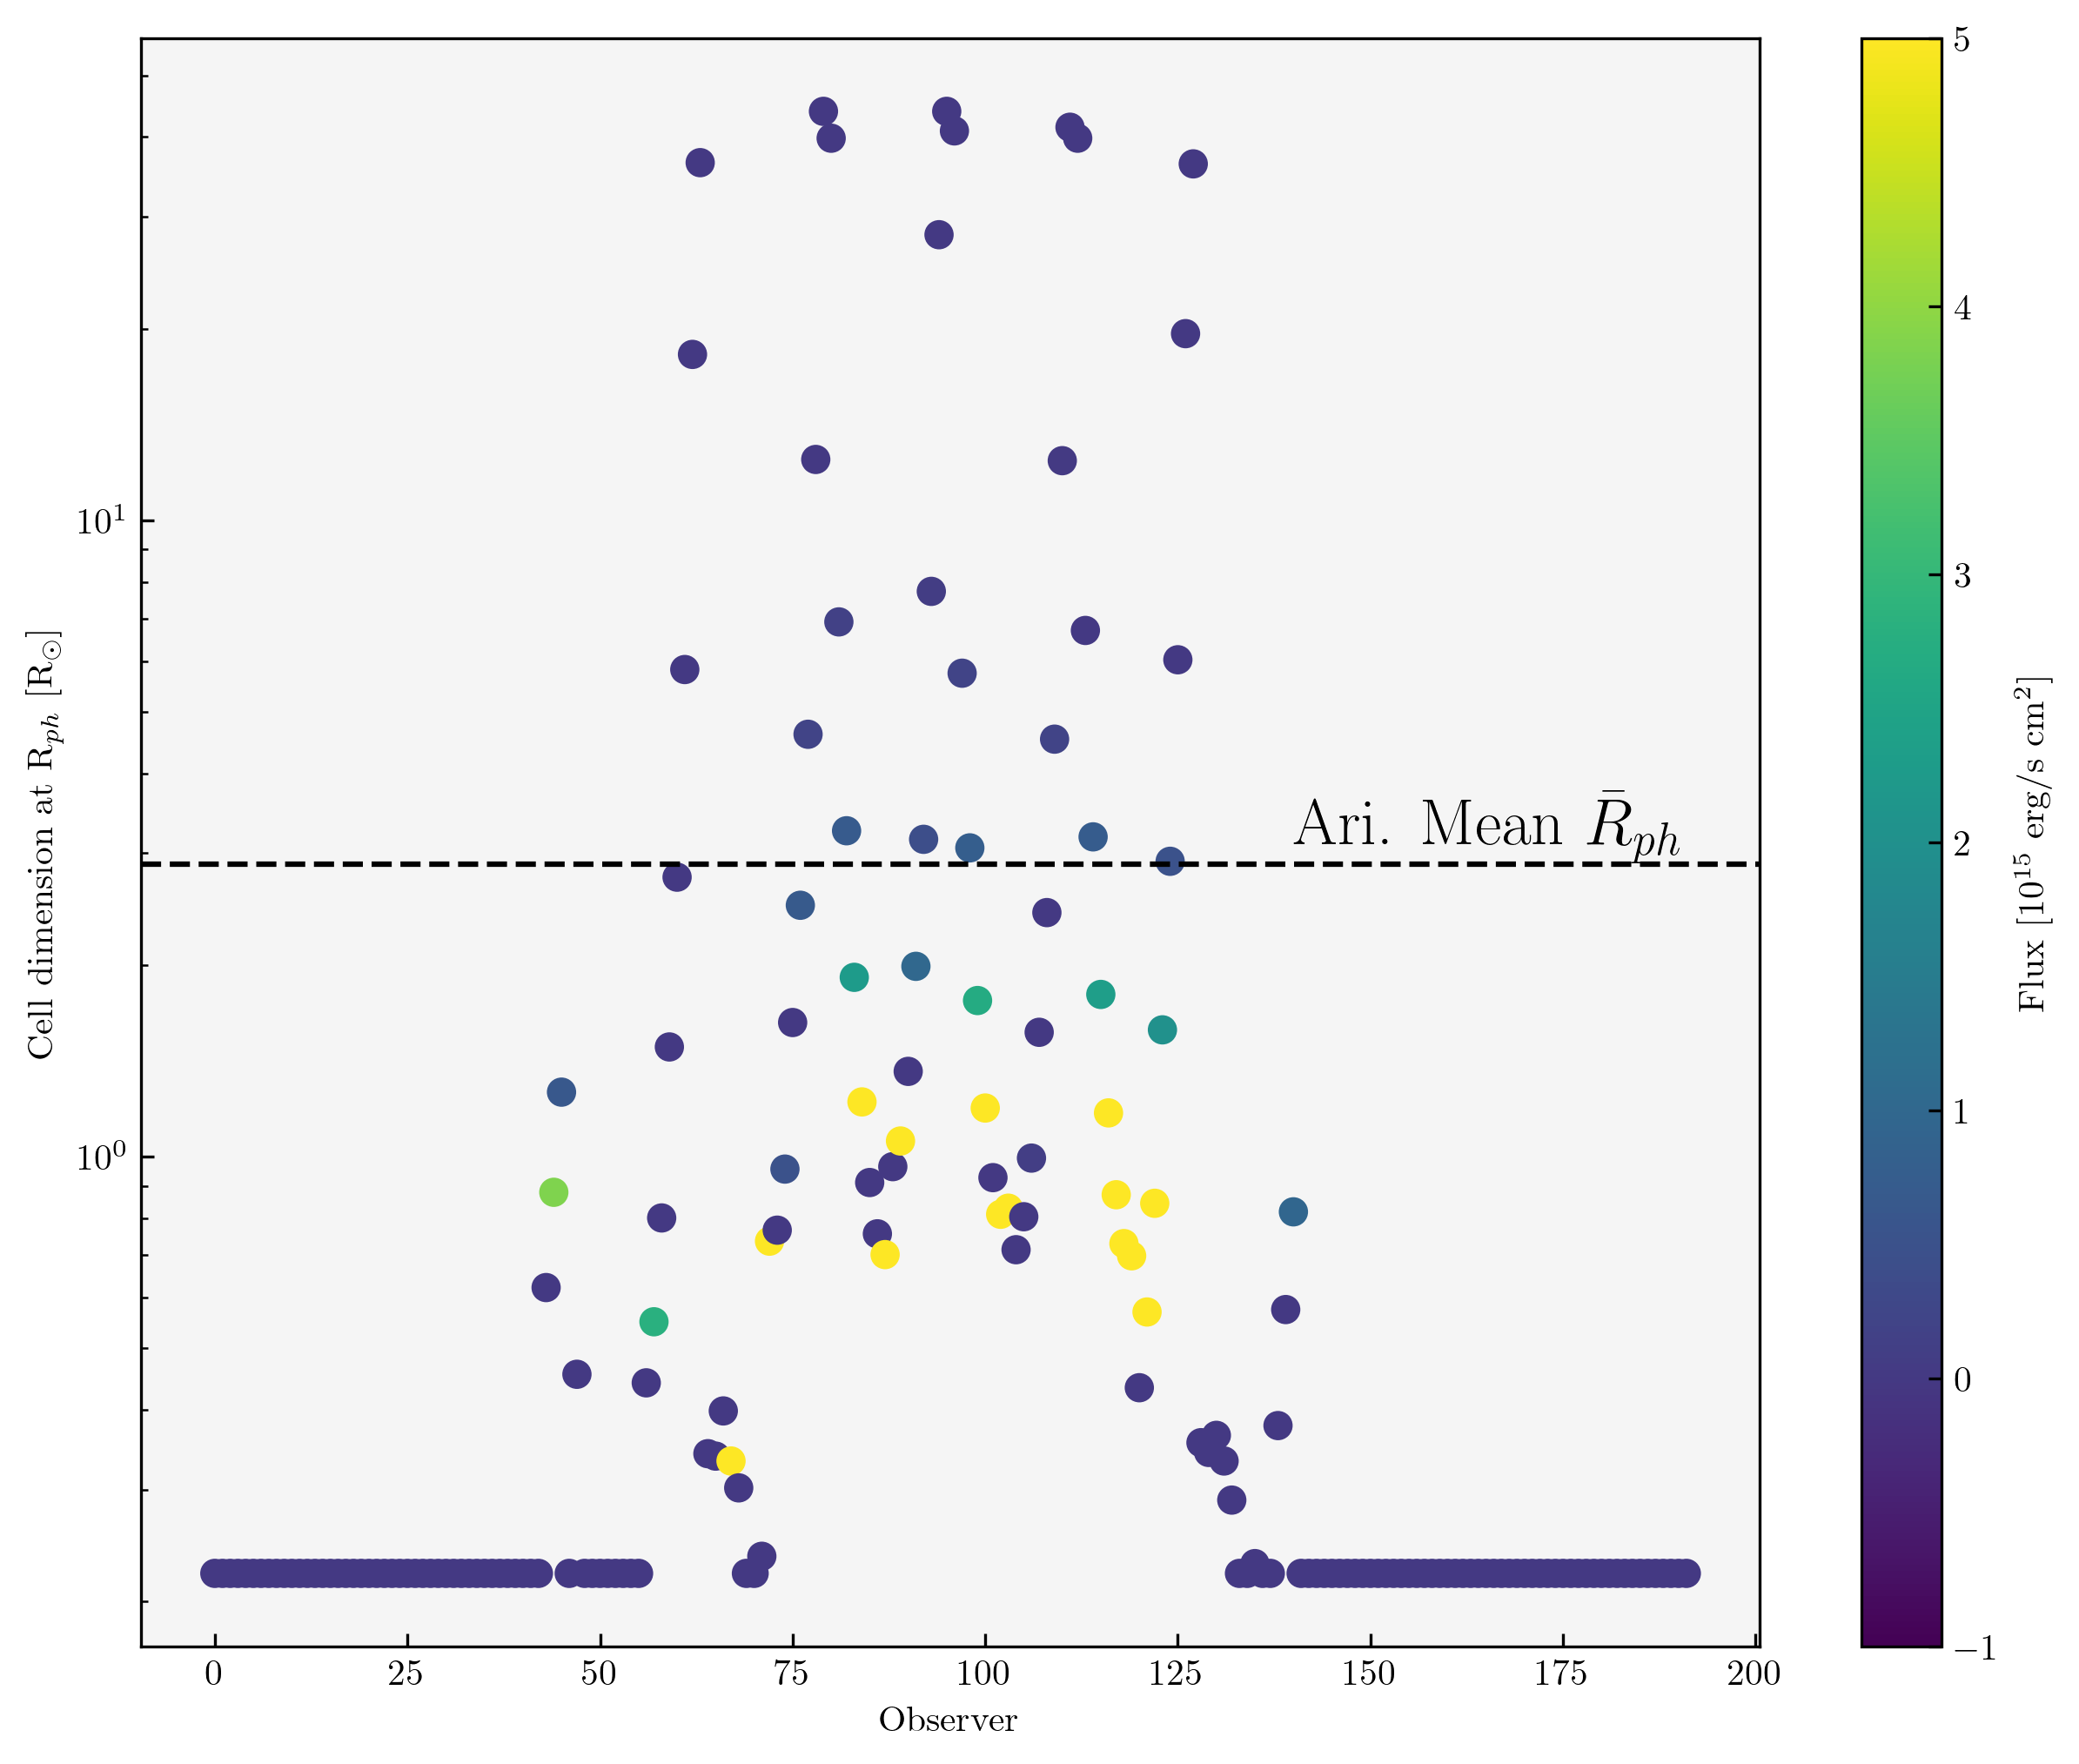

In [56]:
plt.figure(figsize=(10,8))
plotd = plt.scatter(np.arange(192), delta1200, c = flux,  vmin = -1, vmax = 5, s = 50)
cbar = plt.colorbar(plotd)
cbar.set_label(r'Flux [$10^{15}$ erg/s cm$^2$]')
plt.axhline(diffmean1200, c = 'k', linestyle = 'dashed')
plt.text(140, 3.1, r'Ari. Mean $\bar{R}_{ph}$', fontsize = 18)
plt.yscale('log')
plt.ylabel(r'Cell dimension at R$_{ph}$ [R$_\odot$]')
plt.xlabel('Observer')
plt.savefig('Figs/celldim_num1200.png')

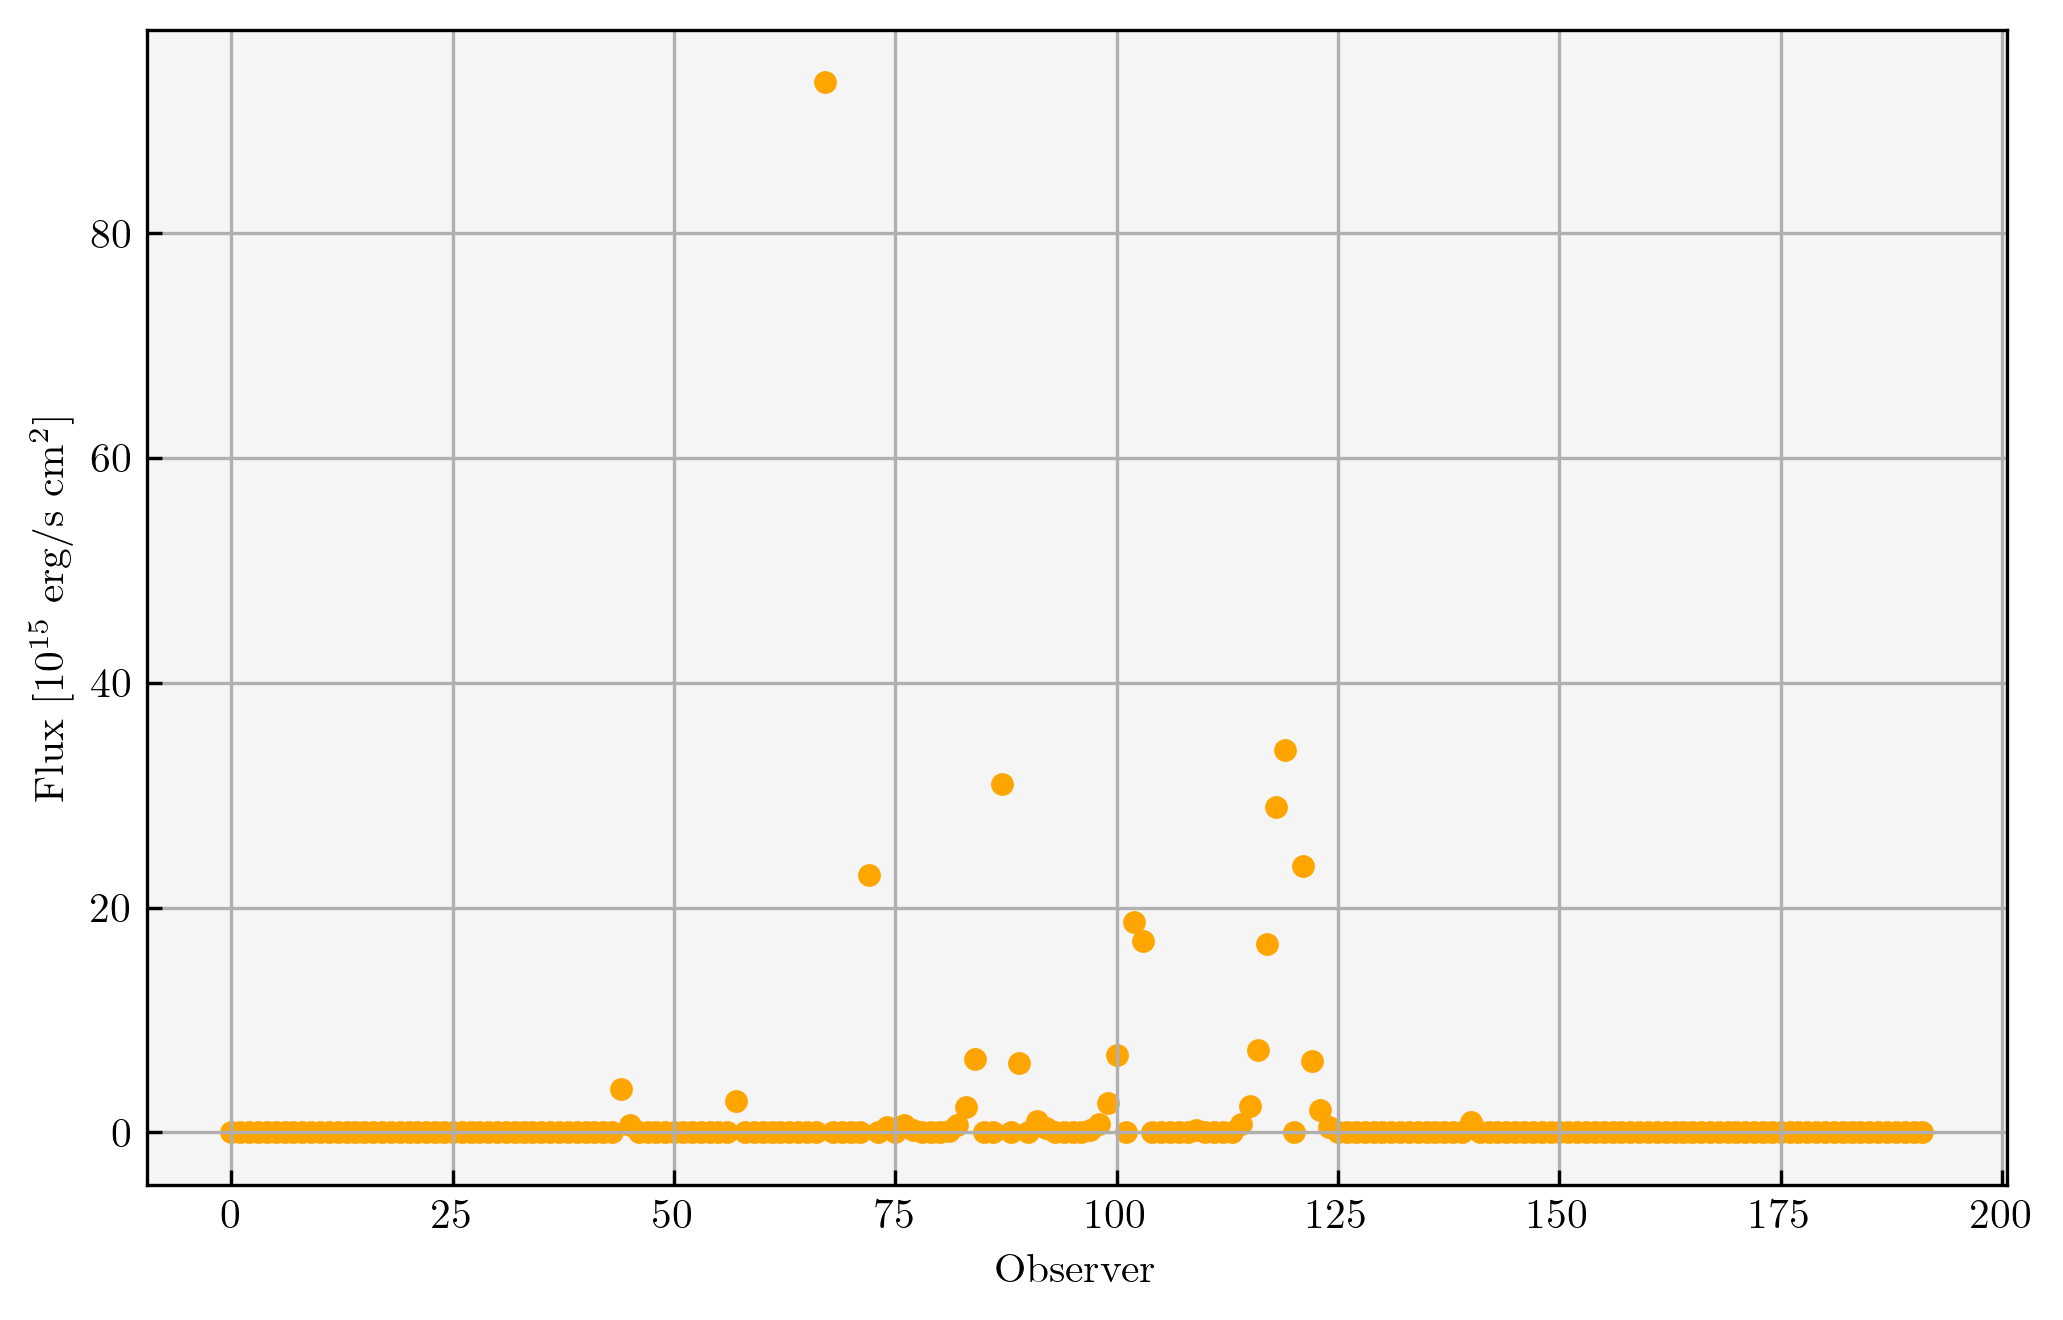

In [57]:
flux_to_plot = flux
for i in range(len(flux_to_plot)):
    if flux_to_plot[i] < 0:
        flux_to_plot[i]=0
plt.figure(figsize = [8,5])
plt.scatter(np.arange(192), flux_to_plot, s = 20, color = 'orange')     
plt.xlabel('Observer')
plt.ylabel(r'Flux [$10^{15}$ erg/s cm$^2$]')
plt.grid()
plt.savefig('Figs/' + str(fix) + 'NOneg_flux.png') 